## **Instalación de librerías:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap

from sklearn.impute import SimpleImputer
#from sklearn import preprocessing
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

#!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00


## **Carga de los datos:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/TFM/DataZonodo.xlsx'

# Lee el archivo Excel con pandas
df = pd.read_excel(path, skiprows=1)

df.head()

,Patient ID,Internal Testing (IT)/External Validatio (EV),Sex (M/F),Age at diagnosis of first tumor {s),Predictions for metastatic disease,Plasma NMN pg/ml,Plasma MN pg/ml,Plasma MTY pg/ml,Previous history of PPGLs? (YES/NO),Adrenal/Extra-adrenal location of primary tumor,...,3L.1,4M.1,5M.1,6L.1,7M.1,8L.1,9M.1,10M.1,11L.1,12M.1
0,1,EV,F,39.0,NO,780.0,14.0,14.0,YES,Adrenal,...,possible,low,low,low,low,low,possible,possible,moderate,possible
1,2,EV,F,28.4,NO,421.0,289.0,19.0,YES,Adrenal,...,possible,low,low,low,low,possible,moderate,possible,low,low
2,3,EV,F,26.8,NO,3801.0,2306.0,28.0,NO,Adrenal,...,possible,moderate,moderate,possible,possible,low,strong,possible,moderate,possible
3,4,EV,F,67.1,NO,1067.0,1700.0,14.0,NO,Adrenal,...,low,low,low,low,low,low,possible,possible,low,low
4,5,EV,F,26.9,NO,127.0,31.0,26.0,YES,Adrenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mostramos las primeras filas de nuestro conjunto de datos.

In [4]:
# Seleccionamos las primeras 14 columnas del DataFrame
df = df.iloc[:, :14]

# Asignamos los nombres correctos a las columnas
df.columns = [
    'Patient ID',
    'Internal Testing/External Validatio',
    'Sex',
    'Age',
    'Predictions for metastatic disease',
    'Plasma NMN',
    'Plasma MN',
    'Plasma MTY',
    'Previous history',
    'Location',
    'Presence of SDHB',
    'Tumor category',
    'Spherical volume',
    'Metastatic'
]

# Reiniciamos los índices y mostramos el DataFrame
df = df.reset_index(drop=True)
df

,Patient ID,Internal Testing/External Validatio,Sex,Age,Predictions for metastatic disease,Plasma NMN,Plasma MN,Plasma MTY,Previous history,Location,Presence of SDHB,Tumor category,Spherical volume,Metastatic
0,1,EV,F,39.0,NO,780.0,14.0,14.0,YES,Adrenal,NO,S,25.0,NO
1,2,EV,F,28.4,NO,421.0,289.0,19.0,YES,Adrenal,NO,B,20.6,NO
2,3,EV,F,26.8,NO,3801.0,2306.0,28.0,NO,Adrenal,NO,B,314.2,NO
3,4,EV,F,67.1,NO,1067.0,1700.0,14.0,NO,Adrenal,NO,B,24.5,NO
4,5,EV,F,26.9,NO,127.0,31.0,26.0,YES,Adrenal,NO,B,4.2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,784,IT,M,47.6,NaN,1221.0,22.0,5.0,YES,Extra-adrenal,NO,S,139.4,YES
784,785,IT,M,34.5,NaN,901.0,38.0,70.0,YES,Extra-adrenal,not tested,S,NaN,YES
785,786,IT,M,61.4,NaN,197.0,10.0,3.0,NO,Extra-adrenal,NO,S,4.5,YES
786,787,IT,M,65.0,NaN,4392.0,61.7,16.7,NO,Extra-adrenal,NO,S,90.3,YES


In [5]:
df.shape

(788, 14)

Descripción de cada variable:


*   **Patient ID:** Identificador único para cada paciente.
*   **Internal Testing (IT)/External Validatio (EV):** Indicador de si la información es resultado de pruebas internas o validación externa.
*   **Sex (M/F):** Género del paciente (Masculino o Femenino).
*   **Age at diagnosis of first tumor (year):** Edad en el momento del diagnóstico del primer tumor, medida en años.
*   **Predictions for metastatic disease:** Predicciones de metástasis realizadas por el modelo del artículo.
*   **Plasma NMN (pg/ml):** Concentración de NMN (Normetanefrina) en plasma, medida en picogramos por mililitro.
*   **Plasma MN (pg/ml):** Concentración de MN (Metanefrina) en plasma, medida en picogramos por mililitro.
*   **Plasma MTY (pg/ml):**	Concentración de MTY (Metoxitiramina) en plasma, medida en picogramos por mililitro.
*   **Previous history of PPGLs? (YES/NO):** Indica si el paciente ha presentado previamente feocromocitomas/paragangliomas.

*   **Location of primary tumor (Adrenal/Extra-adrenal):** Localización del tumor, si es adrenal (en las glándulas suprarrenales) o extra-adrenal (fuera de las glándulas suprarrenales).

*   **Presence of SDHB (YES/NO):** Indica si hay presencia de mutación en el gen SDHB.
*   **Spherical volume of primary tumor ($cm^3$):**	Volumen esférico del tumor, en $cm^3$.

*   **Metastatic (YES/NO):** Indica si hay presencia de metástasis.



## **Análisis exploratorio de los datos:**

In [6]:
# Utilizamos el método describe() excluyendo la columna 'Patient ID'
df.describe()

,Patient ID,Age,Plasma NMN,Plasma MN,Plasma MTY,Spherical volume
count,788.000000,787.000000,787.000000,782.000000,787.000000,752.000000
mean,394.500000,44.026429,1732.808767,411.791816,149.463545,102.240426
std,227.620298,17.397537,4065.753452,866.806911,856.536466,218.252442
min,1.000000,4.200000,23.000000,1.000000,0.000000,0.000000
25%,197.750000,30.700000,216.000000,29.000000,7.000000,10.650000
50%,394.500000,44.300000,621.000000,61.000000,14.000000,32.800000
75%,591.250000,56.400000,1683.500000,350.250000,37.000000,101.150000
max,788.000000,83.200000,67004.000000,6889.000000,12003.000000,2368.000000


**Información del conjunto de datos: Valores no-nulos y tipo de columna.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient ID                           788 non-null    int64  
 1   Internal Testing/External Validatio  788 non-null    object 
 2   Sex                                  788 non-null    object 
 3   Age                                  787 non-null    float64
 4   Predictions for metastatic disease   295 non-null    object 
 5   Plasma NMN                           787 non-null    float64
 6   Plasma MN                            782 non-null    float64
 7   Plasma MTY                           787 non-null    float64
 8   Previous history                     788 non-null    object 
 9   Location                             788 non-null    object 
 10  Presence of SDHB                     788 non-null    object 
 11  Tumor category                  

In [8]:
df.nunique()

Patient ID                             788
Internal Testing/External Validatio      2
Sex                                      2
Age                                    459
Predictions for metastatic disease       5
Plasma NMN                             640
Plasma MN                              377
Plasma MTY                             171
Previous history                         2
Location                                 2
Presence of SDHB                         3
Tumor category                           3
Spherical volume                       501
Metastatic                               2
dtype: int64

**Información del conjunto de datos: Valores nulos de cada columna.**

In [9]:
df.isnull().sum()

Patient ID                               0
Internal Testing/External Validatio      0
Sex                                      0
Age                                      1
Predictions for metastatic disease     493
Plasma NMN                               1
Plasma MN                                6
Plasma MTY                               1
Previous history                         0
Location                                 0
Presence of SDHB                         0
Tumor category                           0
Spherical volume                        36
Metastatic                               0
dtype: int64

Vemos que en la columna *'Predictions for metastatic disease'* hay 493 valores nulos en las 788 filas que hay, lo que significa que más de la mitad de los valores son nulos. Por tanto, no sería viable hacer imputación de los valores que faltan.

Además esta columna no nos interesa como tal, ya que realizaremos un modelo propio para predecir la metástasis. Esta columna solo nos servirá en un futuro para comparar nuestros resultados. Por el momento, vamos a prescindir de ella.

In [10]:
df = df.drop('Predictions for metastatic disease', axis=1)
df.head()

,Patient ID,Internal Testing/External Validatio,Sex,Age,Plasma NMN,Plasma MN,Plasma MTY,Previous history,Location,Presence of SDHB,Tumor category,Spherical volume,Metastatic
0,1,EV,F,39.0,780.0,14.0,14.0,YES,Adrenal,NO,S,25.0,NO
1,2,EV,F,28.4,421.0,289.0,19.0,YES,Adrenal,NO,B,20.6,NO
2,3,EV,F,26.8,3801.0,2306.0,28.0,NO,Adrenal,NO,B,314.2,NO
3,4,EV,F,67.1,1067.0,1700.0,14.0,NO,Adrenal,NO,B,24.5,NO
4,5,EV,F,26.9,127.0,31.0,26.0,YES,Adrenal,NO,B,4.2,NO


In [11]:
df.shape

(788, 13)

Por otro lado, vemos que el resto de columnas que tienen algún valor nulo presentan cantidades de valores ausentes mucho menores. En estos casos sí podemos plantear la realización de imputaciones.

### **Imputaciones:**

* Columna *'Age at diagnosis of first tumor'*:

In [12]:
# Imputamos la media (sustituimos los NAN por el valor de la media)

imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age'] = imp1.fit_transform(df[['Age']])

* Columnas *'Plasma NMN', 'Plasma MN', 'Plasma MTY'*:

In [13]:
# Imputamos la media (sustituimos los NAN por el valor de la media)

imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Plasma NMN'] = imp2.fit_transform(df[['Plasma NMN']])

imp3 = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Plasma MN'] = imp3.fit_transform(df[['Plasma MN']])

imp4 = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Plasma MTY'] = imp4.fit_transform(df[['Plasma MTY']])

* Columna *'Spherical volume of primary tumor'*:




In [14]:
# Imputamos la media (sustituimos los NAN por el valor de la media)

imp5 = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Spherical volume'] = imp5.fit_transform(df[['Spherical volume']])

Después de las imputaciones podemos verificar que ya no quedan valores ausentes en nuestro DataFrame.

In [15]:
# Comprobamos que ya no hay valores nulos en nuestro DataFrame

print(df.isnull().sum())

Patient ID                             0
Internal Testing/External Validatio    0
Sex                                    0
Age                                    0
Plasma NMN                             0
Plasma MN                              0
Plasma MTY                             0
Previous history                       0
Location                               0
Presence of SDHB                       0
Tumor category                         0
Spherical volume                       0
Metastatic                             0
dtype: int64


### **Medias, máximos y mínimos de variables numéricas:**

In [16]:
metastasis_count = df['Metastatic'].value_counts()
print(metastasis_count)

Metastatic
NO     565
YES    223
Name: count, dtype: int64


In [17]:
X = df.iloc[:, 1:-1].copy()
numeric_cols = X.select_dtypes(include=['float64', int]).columns.to_list()
print(numeric_cols)

['Age', 'Plasma NMN', 'Plasma MN', 'Plasma MTY', 'Spherical volume']


In [18]:
df[numeric_cols].mean()

Age                   44.026429
Plasma NMN          1732.808767
Plasma MN            411.791816
Plasma MTY           149.463545
Spherical volume     102.240426
dtype: float64

In [19]:
df[numeric_cols].max()

Age                    83.2
Plasma NMN          67004.0
Plasma MN            6889.0
Plasma MTY          12003.0
Spherical volume     2368.0
dtype: float64

In [20]:
df[numeric_cols].min()

Age                  4.2
Plasma NMN          23.0
Plasma MN            1.0
Plasma MTY           0.0
Spherical volume     0.0
dtype: float64

### **Detección de outliers:**

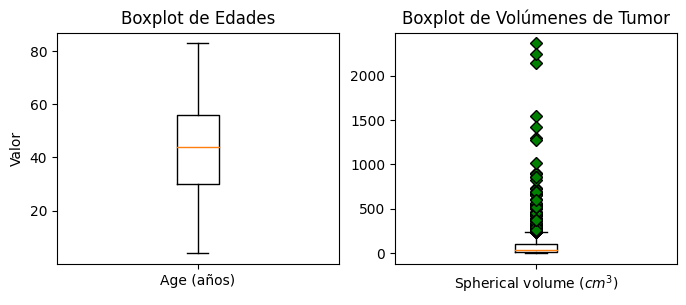

In [21]:
# Extraemos las columnas
edades = df['Age'].astype(int)
vol_tumor = df['Spherical volume'].astype(float)

# Configuración del boxplot
green_diamond = dict(markerfacecolor='g', marker='D')

# Creamos 2 subgráficos en la misma fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Boxplot para edades
ax1.set_title('Boxplot de Edades')
ax1.boxplot(edades, flierprops=green_diamond, labels=["Age (años)"])
ax1.set_ylabel('Valor')  # Corregimos la etiqueta del eje Y

# Boxplot para volúmenes de tumor
ax2.set_title('Boxplot de Volúmenes de Tumor')
ax2.boxplot(vol_tumor, flierprops=green_diamond, labels=["Spherical volume $(cm^3)$"])

plt.show()

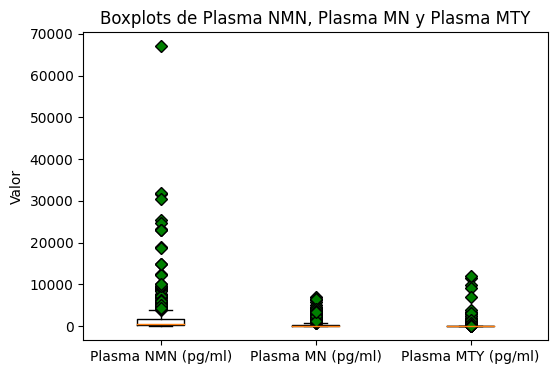

In [22]:
# Extraemos las columnas
plasma_nmn = df['Plasma NMN'].astype(float)
plasma_mn = df['Plasma MN'].astype(float)
plasma_mty = df['Plasma MTY'].astype(float)

# Configuración del boxplot
green_diamond = dict(markerfacecolor='g', marker='D')

# Creamos el gráfico de boxplot combinado
plt.figure(figsize=(6, 4))

# Boxplots combinados para Plasma NMN, Plasma MN y Plasma MTY
plt.boxplot([plasma_nmn, plasma_mn, plasma_mty], flierprops=green_diamond, labels=["Plasma NMN (pg/ml)", "Plasma MN (pg/ml)", "Plasma MTY (pg/ml)"])

# Título y etiquetas de los ejes
plt.title('Boxplots de Plasma NMN, Plasma MN y Plasma MTY')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()


In [23]:
plasma_nmn_outliers = df[df['Plasma NMN'] > 60000]['Plasma NMN']
print(plasma_nmn_outliers)

634    67004.0
Name: Plasma NMN, dtype: float64


In [24]:
# Eliminar los valores mayores a 60000
df = df[df['Plasma NMN'] <= 60000]

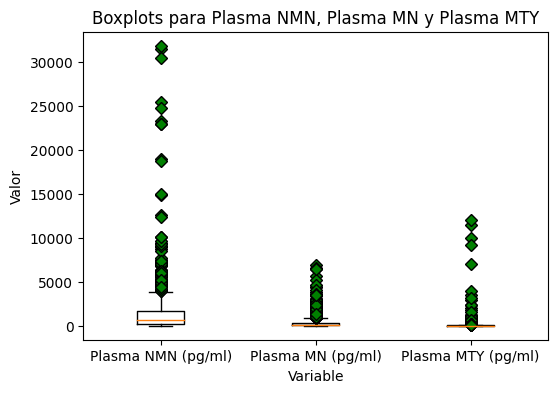

In [25]:
import matplotlib.pyplot as plt

# Extraemos las columnas
plasma_nmn = df['Plasma NMN'].astype(float)
plasma_mn = df['Plasma MN'].astype(float)
plasma_mty = df['Plasma MTY'].astype(float)

# Configuración del boxplot
green_diamond = dict(markerfacecolor='g', marker='D')

# Creamos el gráfico de boxplot combinado
plt.figure(figsize=(6, 4))

# Boxplots combinados para Plasma NMN, Plasma MN y Plasma MTY
plt.boxplot([plasma_nmn, plasma_mn, plasma_mty], flierprops=green_diamond, labels=["Plasma NMN (pg/ml)", "Plasma MN (pg/ml)", "Plasma MTY (pg/ml)"])

# Título y etiquetas de los ejes
plt.title('Boxplots para Plasma NMN, Plasma MN y Plasma MTY')
plt.xlabel('Variable')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()


### **Comportamiento de los datos:**



En esta sección veremos el comportamiento de cada variable y su relación con la aparición de metástasis.

* **Pacientes por grupo de edad: Pediátricos y Adultos**

Añadimos una nueva columna a nuestro DataFrame en la que se dividan los pacientes en dos grupos de edad: Pediátricos (de 0 a 18 años) y Adultos (de 18 años en adelante).

In [26]:
# Creamos una nueva columna 'Age Group' para clasificar edades en 'Pediatric' y 'Adult'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, float('inf')], labels=['Pediatric', 'Adult']) #La edad de cambio es de 18?

# Mostramos las primeras filas del DataFrame con la nueva columna
df.head()

,Patient ID,Internal Testing/External Validatio,Sex,Age,Plasma NMN,Plasma MN,Plasma MTY,Previous history,Location,Presence of SDHB,Tumor category,Spherical volume,Metastatic,Age Group
0,1,EV,F,39.0,780.0,14.0,14.0,YES,Adrenal,NO,S,25.0,NO,Adult
1,2,EV,F,28.4,421.0,289.0,19.0,YES,Adrenal,NO,B,20.6,NO,Adult
2,3,EV,F,26.8,3801.0,2306.0,28.0,NO,Adrenal,NO,B,314.2,NO,Adult
3,4,EV,F,67.1,1067.0,1700.0,14.0,NO,Adrenal,NO,B,24.5,NO,Adult
4,5,EV,F,26.9,127.0,31.0,26.0,YES,Adrenal,NO,B,4.2,NO,Adult


Vamos a visualizar el número total de pacientes, el número de pacientes con metástasis y el correspondiente porcentaje de pacientes con metástasis en cada grupo de edad.

In [27]:
# Obtenemos el número total de pacientes por grupo de edad
conteo_edad = df.groupby('Age Group').size()

# Mostramos el resultado
print("Número total de pacientes por grupo de edad:")
print(conteo_edad)

Número total de pacientes por grupo de edad:
Age Group
Pediatric     63
Adult        724
dtype: int64


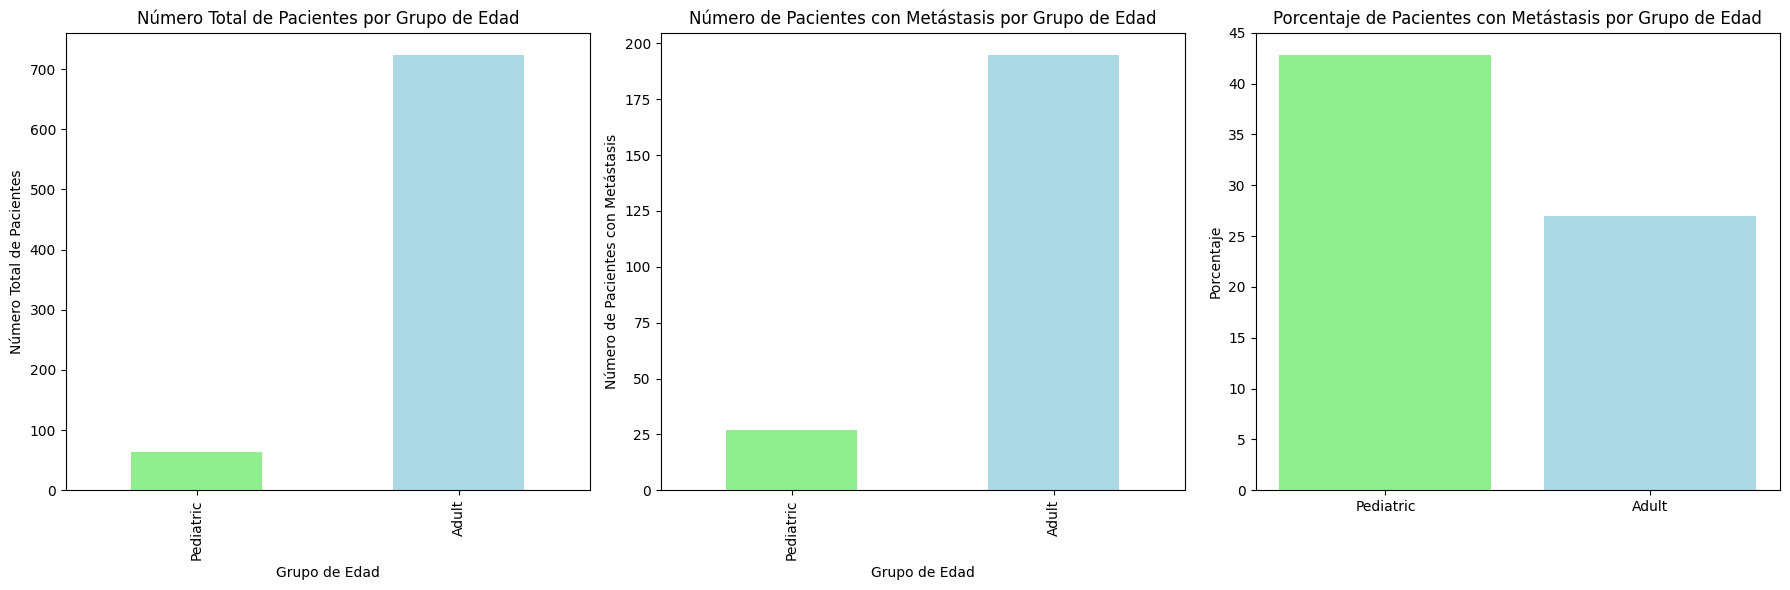

In [28]:
# Contamos el número de pacientes por grupo de edad que presentan metástasis
conteo_metastasis_edad = df[df['Metastatic'] == 'YES'].groupby('Age Group').size()

# Porcentajes de pacientes con metástasis en cada grupo
pediatric_metastasis_percentage = (df[df['Age Group'] == 'Pediatric']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']
adult_metastasis_percentage = (df[df['Age Group'] == 'Adult']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']

# Creamos 3 subgráficos en la misma fila
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para el número total de pacientes por grupo de edad
conteo_edad.plot(kind='bar', color=['lightgreen', 'lightblue'], ax=axs[0])
axs[0].set_ylabel('Número Total de Pacientes')
axs[0].set_xlabel('Grupo de Edad')
axs[0].set_title('Número Total de Pacientes por Grupo de Edad')

# Gráfico de barras para el número de pacientes con metástasis por grupo de edad
conteo_metastasis_edad.plot(kind='bar', color=['lightgreen', 'lightblue'], ax=axs[1])
axs[1].set_ylabel('Número de Pacientes con Metástasis')
axs[1].set_xlabel('Grupo de Edad')
axs[1].set_title('Número de Pacientes con Metástasis por Grupo de Edad')

# Gráfico de barras para el porcentaje de pacientes con metástasis por grupo de edad
axs[2].bar(['Pediatric', 'Adult'], [pediatric_metastasis_percentage, adult_metastasis_percentage], color=['lightgreen', 'lightblue'])
axs[2].set_title('Porcentaje de Pacientes con Metástasis por Grupo de Edad')
axs[2].set_ylabel('Porcentaje')

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [29]:
[pediatric_metastasis_percentage, adult_metastasis_percentage]

[42.857142857142854, 26.933701657458563]

Comprobamos que el 43% de los pacientes pediátricos presentan metástasis, mientras que en adultos se evidencia metástasis en un 27% de los casos. Por tanto, se observa una diferencia significativa en la prevalencia de metástasis entre los pacientes pediátricos y adultos.

- **Pacientes por Género**

Vamos a visualizar el número total de pacientes, el número de pacientes con metástasis y el correspondiente porcentaje de pacientes con metástasis correspondiente a cada género.

In [30]:
# Obtenemos el número total de pacientes por género
conteo_pacientes = df.groupby('Sex').size()

# Mostramos el resultado
print("Número total de pacientes por género:")
print(conteo_pacientes)

Número total de pacientes por género:
Sex
F    410
M    377
dtype: int64


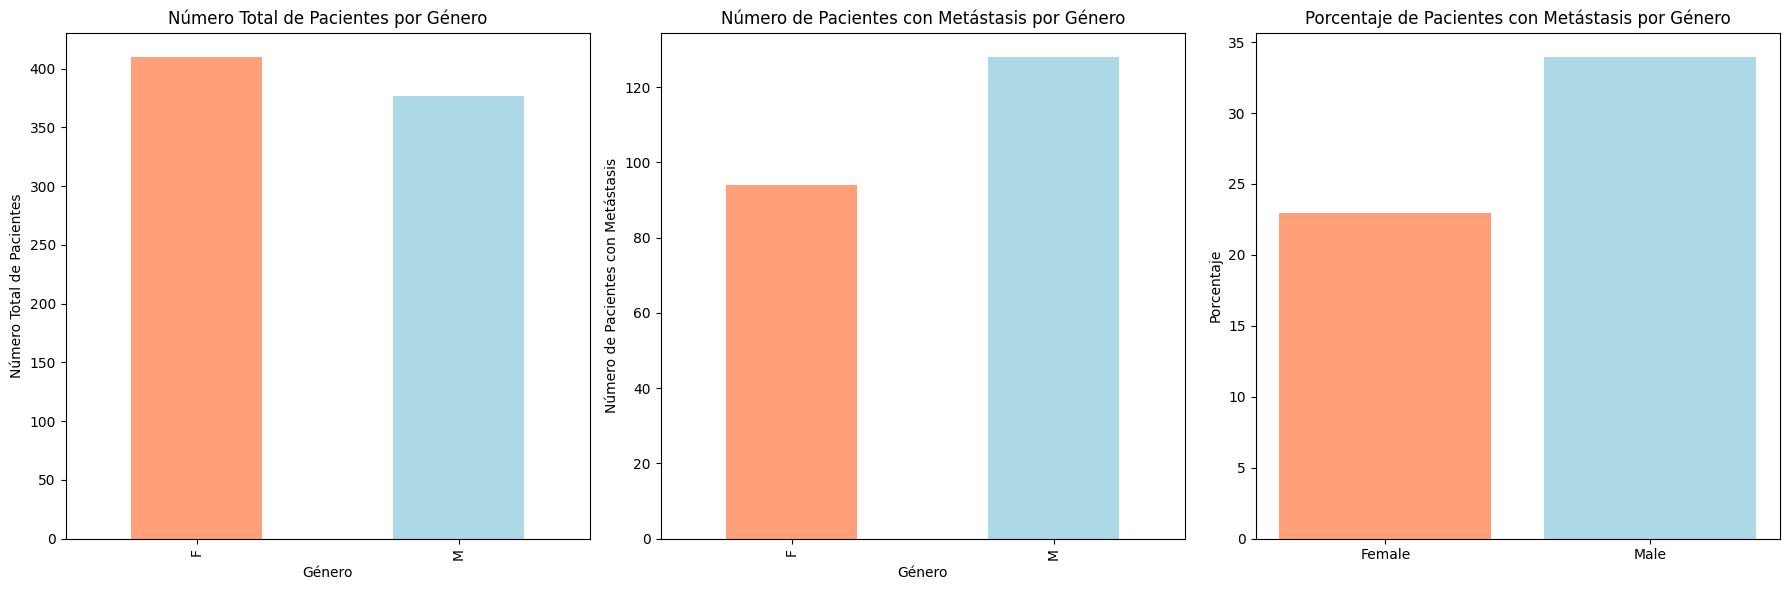

In [31]:
# Contamos el número de pacientes por género que presentan metástasis
conteo_metastasis = df[df['Metastatic'] == 'YES'].groupby('Sex').size()

# Creamos el gráfico de barras para el número de pacientes con metástasis por género
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para el número total de pacientes por género
conteo_pacientes.plot(kind='bar', color=['lightsalmon', 'lightblue'], ax=axs[0])
axs[0].set_ylabel('Número Total de Pacientes')
axs[0].set_xlabel('Género')
axs[0].set_title('Número Total de Pacientes por Género')

# Gráfico de barras para el número de pacientes con metástasis por género
conteo_metastasis.plot(kind='bar', color=['lightsalmon', 'lightblue'], ax=axs[1])
axs[1].set_ylabel('Número de Pacientes con Metástasis')
axs[1].set_xlabel('Género')
axs[1].set_title('Número de Pacientes con Metástasis por Género')

# Calculamos los porcentajes de pacientes con metástasis en cada grupo de género
male_metastasis_percentage = (df[df['Sex'] == 'M']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']
female_metastasis_percentage = (df[df['Sex'] == 'F']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']

# Creamos un DataFrame con los porcentajes de metástasis por grupo de género
percentage_df_gender = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Metastasis Percentage': [male_metastasis_percentage, female_metastasis_percentage]
})

# Gráfico de barras para el porcentaje de metástasis por género
axs[2].bar(percentage_df_gender['Sex'][::-1], percentage_df_gender['Metastasis Percentage'][::-1], color=['lightsalmon', 'lightblue'])
axs[2].set_title('Porcentaje de Pacientes con Metástasis por Género')
axs[2].set_ylabel('Porcentaje')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [32]:
percentage_df_gender['Metastasis Percentage']

0    33.952255
1    22.926829
Name: Metastasis Percentage, dtype: float64

Podemos concluir que aproximadamente el 34% de los pacientes masculinos evidencian la presencia de metástasis, en comparación con un 23% en el caso de las pacientes femeninas. Este análisis muestra diferencias en la incidencia de metástasis entre los géneros, siendo más prevalente en los pacientes hombres.

- **Presencia de mutación en el gen SDHB**

In [33]:
print(df['Presence of SDHB'].unique())

['NO' 'YES' 'not tested']


In [34]:
# Contar la cantidad de cada valor en la columna 'Presence of SDHB'
conteo_sdhb = df['Presence of SDHB'].value_counts()
print(conteo_sdhb)

Presence of SDHB
NO            595
YES           112
not tested     80
Name: count, dtype: int64


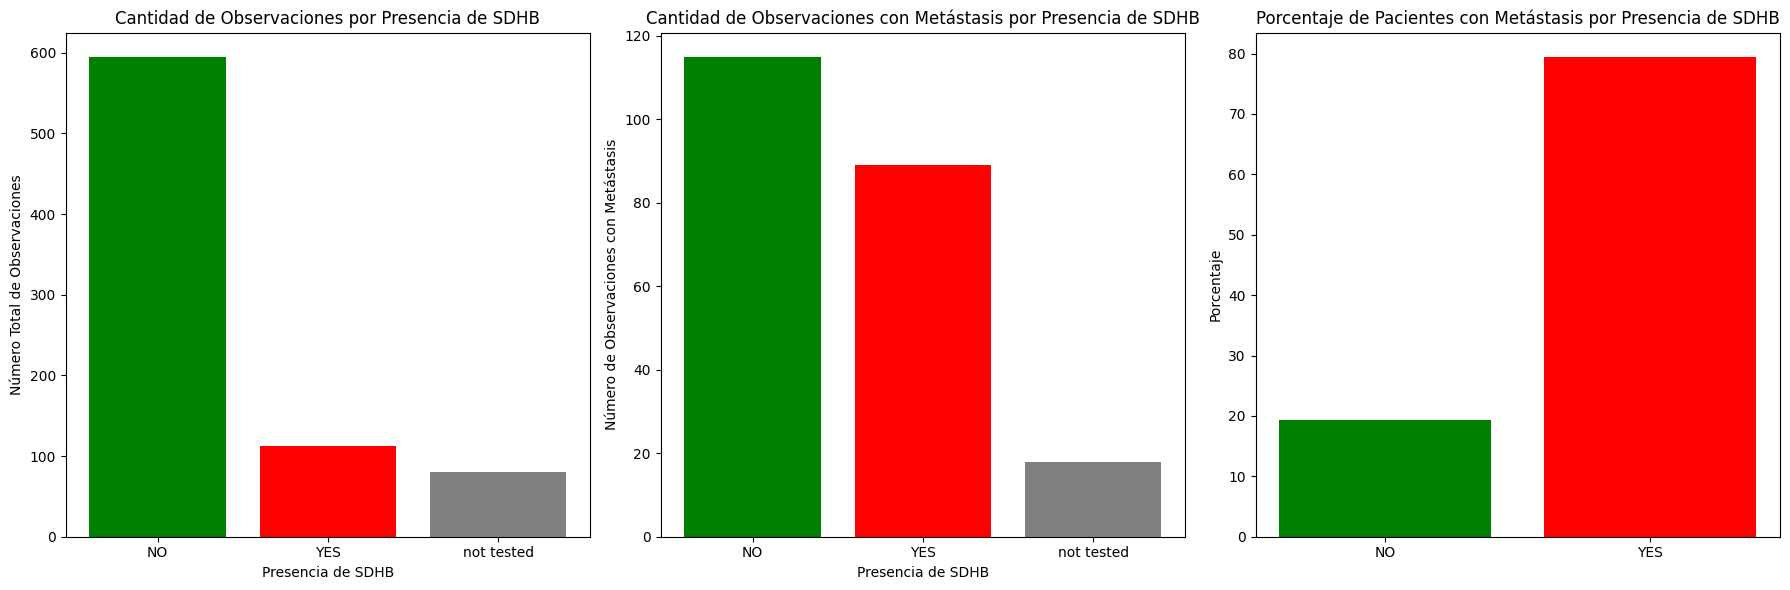

In [35]:
# Creamos el gráfico de barras para el número total de pacientes por presencia de SDHB
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para el número total de pacientes por presencia de SDHB
axs[0].bar(conteo_sdhb.index, conteo_sdhb, color=['green', 'red', 'grey'])
axs[0].set_ylabel('Número Total de Observaciones')
axs[0].set_xlabel('Presencia de SDHB')
axs[0].set_title('Cantidad de Observaciones por Presencia de SDHB')

# Contamos el número de pacientes por presencia de SDHB que presentan metástasis
conteo_metastasis_sdhb = df[df['Metastatic'] == 'YES']['Presence of SDHB'].value_counts()

# Gráfico de barras para el número de pacientes con metástasis por presencia de SDHB
axs[1].bar(conteo_metastasis_sdhb.index, conteo_metastasis_sdhb, color=['green', 'red', 'grey'])
axs[1].set_ylabel('Número de Observaciones con Metástasis')
axs[1].set_xlabel('Presencia de SDHB')
axs[1].set_title('Cantidad de Observaciones con Metástasis por Presencia de SDHB')

# Calculamos los porcentajes de pacientes con metástasis en cada grupo de presencia de SDHB
metastasis_percentage_sdhn = (df[df['Presence of SDHB'] == 'NO']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']
metastasis_percentage_sdhb = (df[df['Presence of SDHB'] == 'YES']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']

# Creamos un DataFrame con los porcentajes de metástasis por presencia de SDHB
percentage_df_sdhb = pd.DataFrame({
    'Presence of SDHB': ['NO', 'YES'],
    'Metastasis Percentage': [metastasis_percentage_sdhn, metastasis_percentage_sdhb]
})

# Gráfico de barras para el porcentaje de metástasis por presencia de SDHB
axs[2].bar(percentage_df_sdhb['Presence of SDHB'], percentage_df_sdhb['Metastasis Percentage'], color=['green', 'red', 'grey'])
axs[2].set_title('Porcentaje de Pacientes con Metástasis por Presencia de SDHB')
axs[2].set_ylabel('Porcentaje')

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [36]:
percentage_df_sdhb['Metastasis Percentage']

0    19.327731
1    79.464286
Name: Metastasis Percentage, dtype: float64

En los pacientes con la mutación en este gen, la presencia de metástasis es notablemente alta, alcanzando casi el 80% de los casos. Esto sugiere una fuerte asociación entre la presencia de la mutación y la propensión a desarrollar metástasis en los pacientes afectados.

* **Internal Testing/External Validatio**




In [37]:
# Contamos la cantidad de casos de "Internal Testing (IT)" y "External Validation (EV)"
conteo_it_ev = df.groupby('Internal Testing/External Validatio').size()

# Mostramos el resultado
print("Número total de pacientes por categoría:")
print(conteo_it_ev)

Número total de pacientes por categoría:
Internal Testing/External Validatio
EV    295
IT    492
dtype: int64


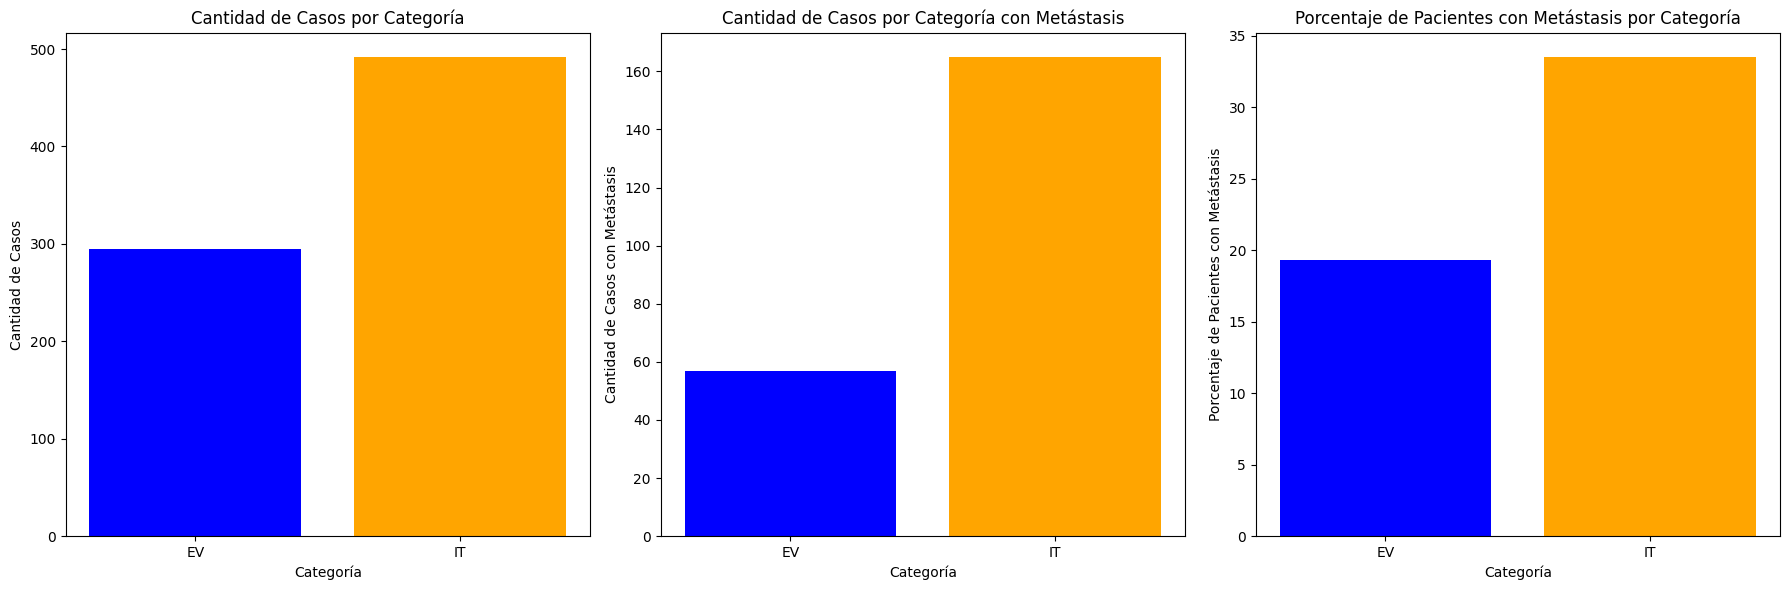

In [38]:
# Creamos el gráfico de barras para la cantidad de casos
plt.figure(figsize=(18, 6))

# Gráfico de barras para el número total de casos
plt.subplot(131)
plt.bar(conteo_it_ev.index, conteo_it_ev, color=['blue', 'orange'])
plt.title('Cantidad de Casos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Casos')

# Gráfico de barras para el número de casos con metástasis
plt.subplot(132)
conteo_metastasis_categoria = df[df['Metastatic'] == 'YES']['Internal Testing/External Validatio'].value_counts()
plt.bar(conteo_metastasis_categoria.index[::-1], conteo_metastasis_categoria[::-1], color=['blue', 'orange'])
plt.title('Cantidad de Casos por Categoría con Metástasis')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Casos con Metástasis')

# Gráfico de barras para el porcentaje de pacientes con metástasis por categoría
plt.subplot(133)
porcentaje_metastasis_categoria = conteo_metastasis_categoria / conteo_it_ev * 100
plt.bar(porcentaje_metastasis_categoria.index, porcentaje_metastasis_categoria, color=['blue', 'orange'])
plt.title('Porcentaje de Pacientes con Metástasis por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje de Pacientes con Metástasis')

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [39]:
porcentaje_metastasis_categoria

Internal Testing/External Validatio
EV    19.322034
IT    33.536585
dtype: float64

Se comprueba que el 19% de los pacientes inspeccionados externamente presentan metástasis, mientras que en pacientes examinados internamente se evidencia metástasis en un 33% de los casos.





* **Previous history of PPGLs?**

In [40]:
# Contamos la cantidad de casos de "Internal Testing (IT)" y "External Validation (EV)"
conteo_prev_history = df.groupby('Previous history').size()

# Mostramos el resultado
print("Número total de pacientes por historial previo:")
print(conteo_prev_history)

Número total de pacientes por historial previo:
Previous history
NO     566
YES    221
dtype: int64


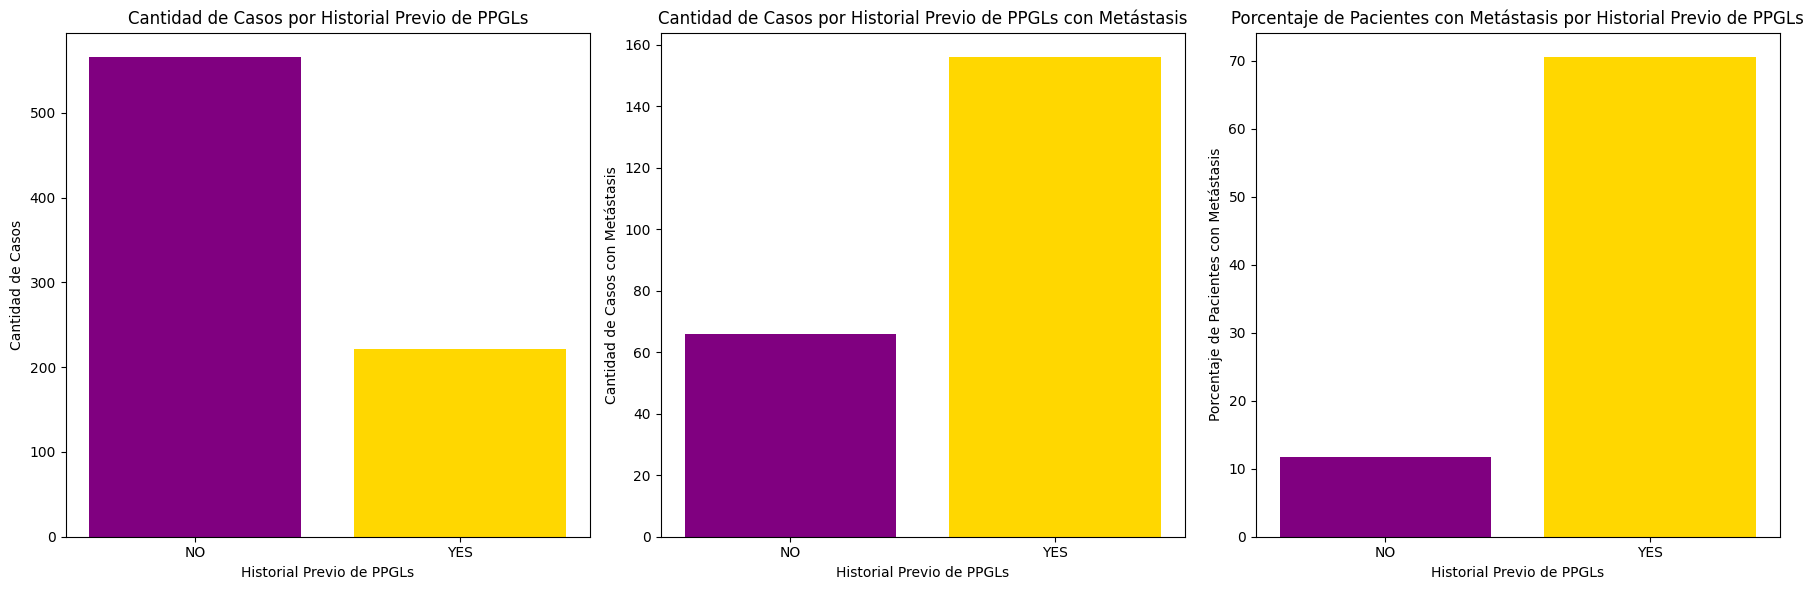

In [41]:
# Creamos el gráfico de barras para la cantidad de casos
plt.figure(figsize=(18, 6))

# Gráfico de barras para el número total de casos
plt.subplot(131)
plt.bar(conteo_prev_history.index, conteo_prev_history, color=['purple', 'gold'])
plt.title('Cantidad de Casos por Historial Previo de PPGLs')
plt.xlabel('Historial Previo de PPGLs')
plt.ylabel('Cantidad de Casos')

# Gráfico de barras para el número de casos con metástasis
plt.subplot(132)
conteo_metastasis_prev_history = df[df['Metastatic'] == 'YES']['Previous history'].value_counts()
plt.bar(conteo_metastasis_prev_history.index[::-1], conteo_metastasis_prev_history[::-1], color=['purple', 'gold'])
plt.title('Cantidad de Casos por Historial Previo de PPGLs con Metástasis')
plt.xlabel('Historial Previo de PPGLs')
plt.ylabel('Cantidad de Casos con Metástasis')

# Gráfico de barras para el porcentaje de pacientes con metástasis por historial previo de PPGLs
plt.subplot(133)
porcentaje_metastasis_prev_history = conteo_metastasis_prev_history / conteo_prev_history * 100
plt.bar(porcentaje_metastasis_prev_history.index, porcentaje_metastasis_prev_history, color=['purple', 'gold'])
plt.title('Porcentaje de Pacientes con Metástasis por Historial Previo de PPGLs')
plt.xlabel('Historial Previo de PPGLs')
plt.ylabel('Porcentaje de Pacientes con Metástasis')

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [42]:
porcentaje_metastasis_prev_history

Previous history
NO     11.660777
YES    70.588235
dtype: float64


Se observa que entre los casos con historial previo de PPGLs, un significativo 71% presenta metástasis. Esta proporción sugiere una asociación importante entre el historial previo de PPGLs y la presencia de metástasis en los pacientes.

* **Location of the tumor**

In [43]:
# Contamos el número total de pacientes por ubicación del tumor
conteo_localizacion = df.groupby('Location').size()

# Mostramos el resultado
print("Número total de pacientes por ubicación del tumor:")
print(conteo_localizacion)

Número total de pacientes por ubicación del tumor:
Location
Adrenal          528
Extra-adrenal    259
dtype: int64


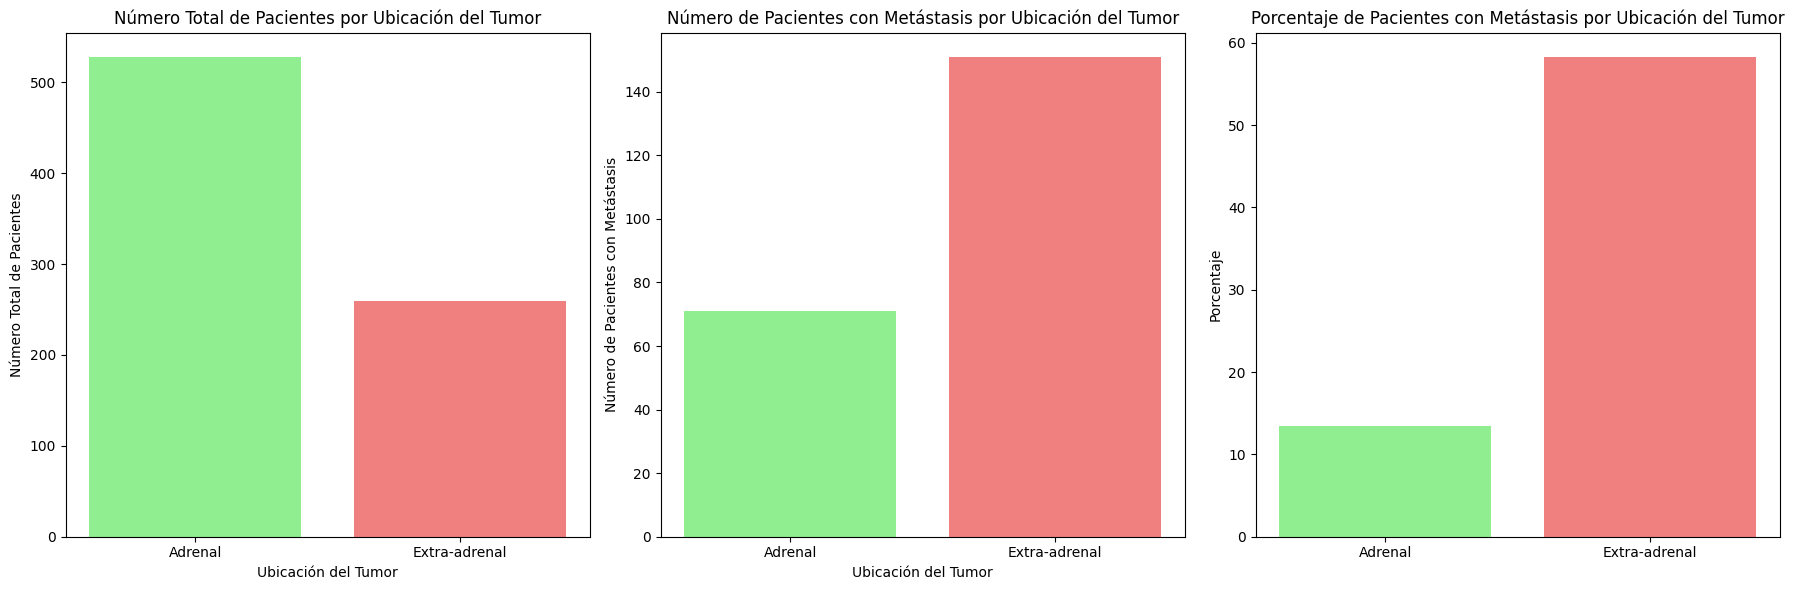

In [44]:
# Creamos el gráfico de barras para el número total de pacientes por ubicación del tumor con Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para el número total de pacientes por ubicación del tumor
axs[0].bar(conteo_localizacion.index, conteo_localizacion, color=['lightgreen', 'lightcoral'])
axs[0].set_ylabel('Número Total de Pacientes')
axs[0].set_xlabel('Ubicación del Tumor')
axs[0].set_title('Número Total de Pacientes por Ubicación del Tumor')

# Contamos el número de pacientes por ubicación del tumor que presentan metástasis
conteo_metastasis_localizacion = df[df['Metastatic'] == 'YES']['Location'].value_counts()

# Gráfico de barras para el número de pacientes con metástasis por ubicación del tumor
axs[1].bar(conteo_metastasis_localizacion.index[::-1], conteo_metastasis_localizacion[::-1], color=['lightgreen', 'lightcoral'])
axs[1].set_ylabel('Número de Pacientes con Metástasis')
axs[1].set_xlabel('Ubicación del Tumor')
axs[1].set_title('Número de Pacientes con Metástasis por Ubicación del Tumor')

# Calculamos los porcentajes de pacientes con metástasis en cada grupo de ubicación del tumor
metastasis_percentage_adrenal = (df[df['Location'] == 'Adrenal']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']
metastasis_percentage_extra_adrenal = (df[df['Location'] == 'Extra-adrenal']['Metastatic'].value_counts(normalize=True) * 100).loc['YES']

# Creamos un DataFrame con los porcentajes de metástasis por ubicación del tumor
percentage_df_location = pd.DataFrame({
    'Location': ['Adrenal', 'Extra-adrenal'],
    'Metastasis Percentage': [metastasis_percentage_adrenal, metastasis_percentage_extra_adrenal]
})

# Gráfico de barras para el porcentaje de metástasis por ubicación del tumor
axs[2].bar(percentage_df_location['Location'], percentage_df_location['Metastasis Percentage'], color=['lightgreen', 'lightcoral'])
axs[2].set_title('Porcentaje de Pacientes con Metástasis por Ubicación del Tumor')
axs[2].set_ylabel('Porcentaje')

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [45]:
percentage_df_location['Metastasis Percentage']

0    13.446970
1    58.301158
Name: Metastasis Percentage, dtype: float64

Podemos concluir que aproximadamente el 58% de los pacientes cuyo tumor se ubica fuera de las glándulas suprarrenales evidencian la presencia de metástasis, en comparación con un 13% en el caso de los pacientes con tumores adrenales.

### **Selección de características:**


 #### **Matriz de dispersión:**

En primer lugar, vamos a realizar una comparación uno a uno de cada variable numérica del conjunto respecto a la variable **Metastatic**.

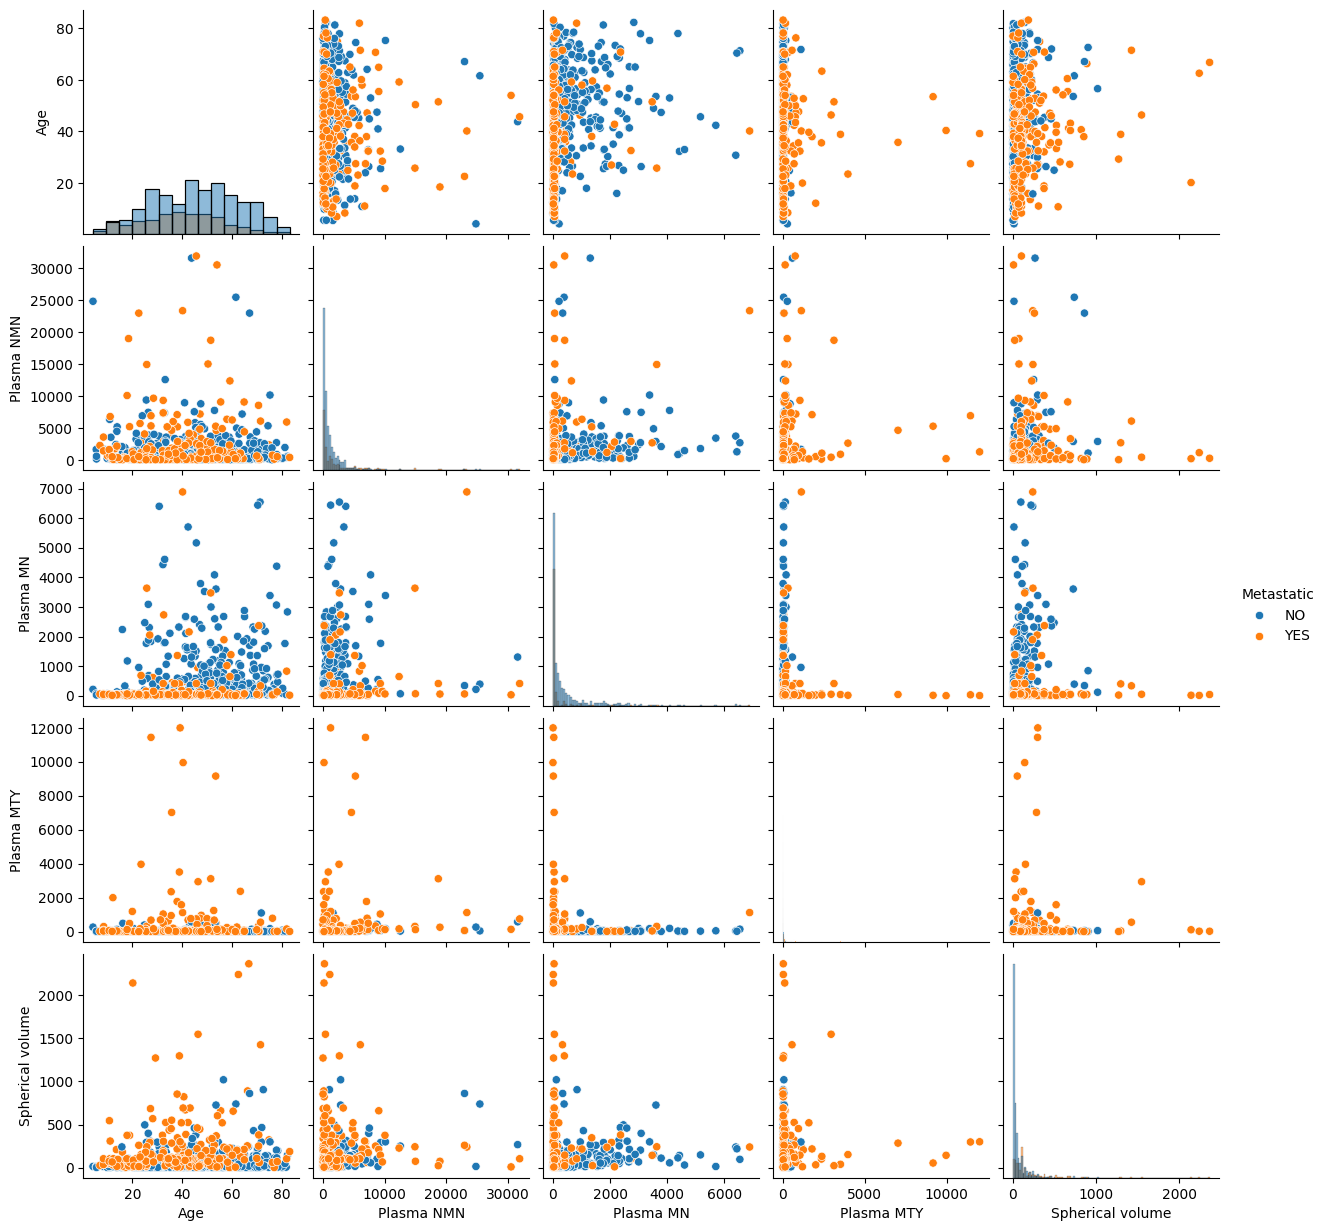

In [46]:
numeric_cols_with_metastatic = numeric_cols + ['Metastatic']

# Creamos el pairplot
sns.pairplot(data=df[numeric_cols_with_metastatic], diag_kind='hist', hue='Metastatic')
plt.show()

Ahora vamos a realizar una comparación uno a uno de cada variable numérica del conjunto respecto al **Grupo de Edad**.

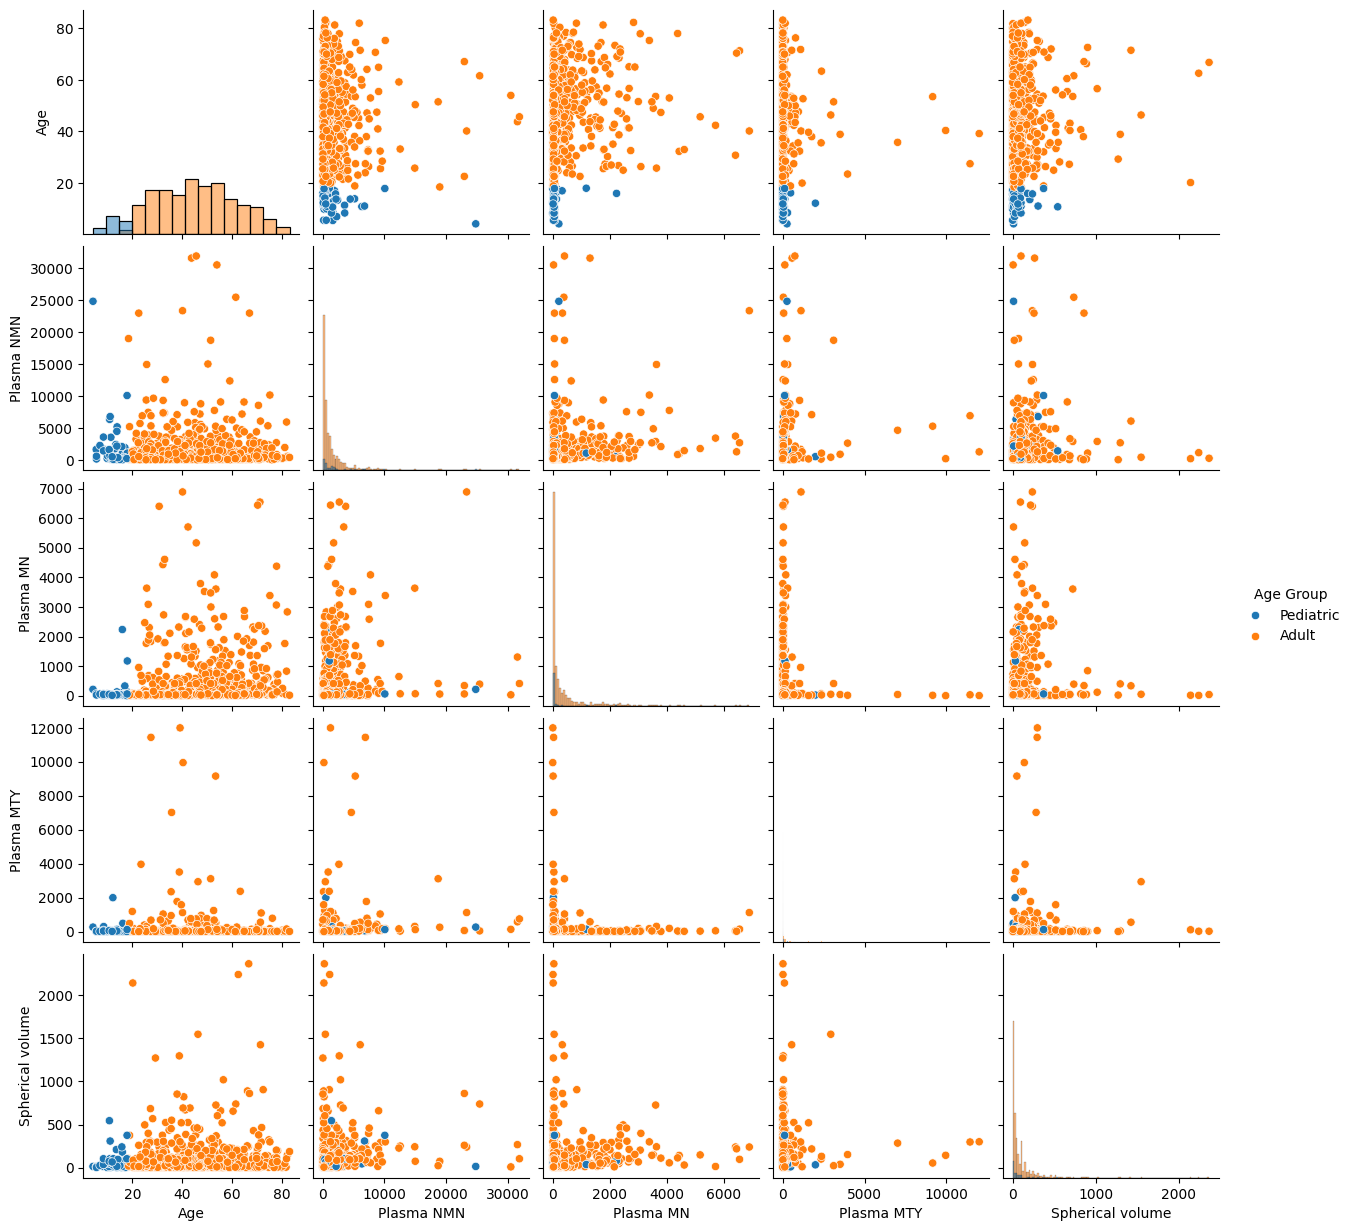

In [47]:
numeric_cols_with_sex = numeric_cols + ['Age Group']

# Creamos el pairplot
sns.pairplot(data=df[numeric_cols_with_sex], diag_kind='hist', hue='Age Group')
plt.show()

Por último, vamos a realizar una comparación uno a uno de cada variable numérica del conjunto respecto al **Género**.

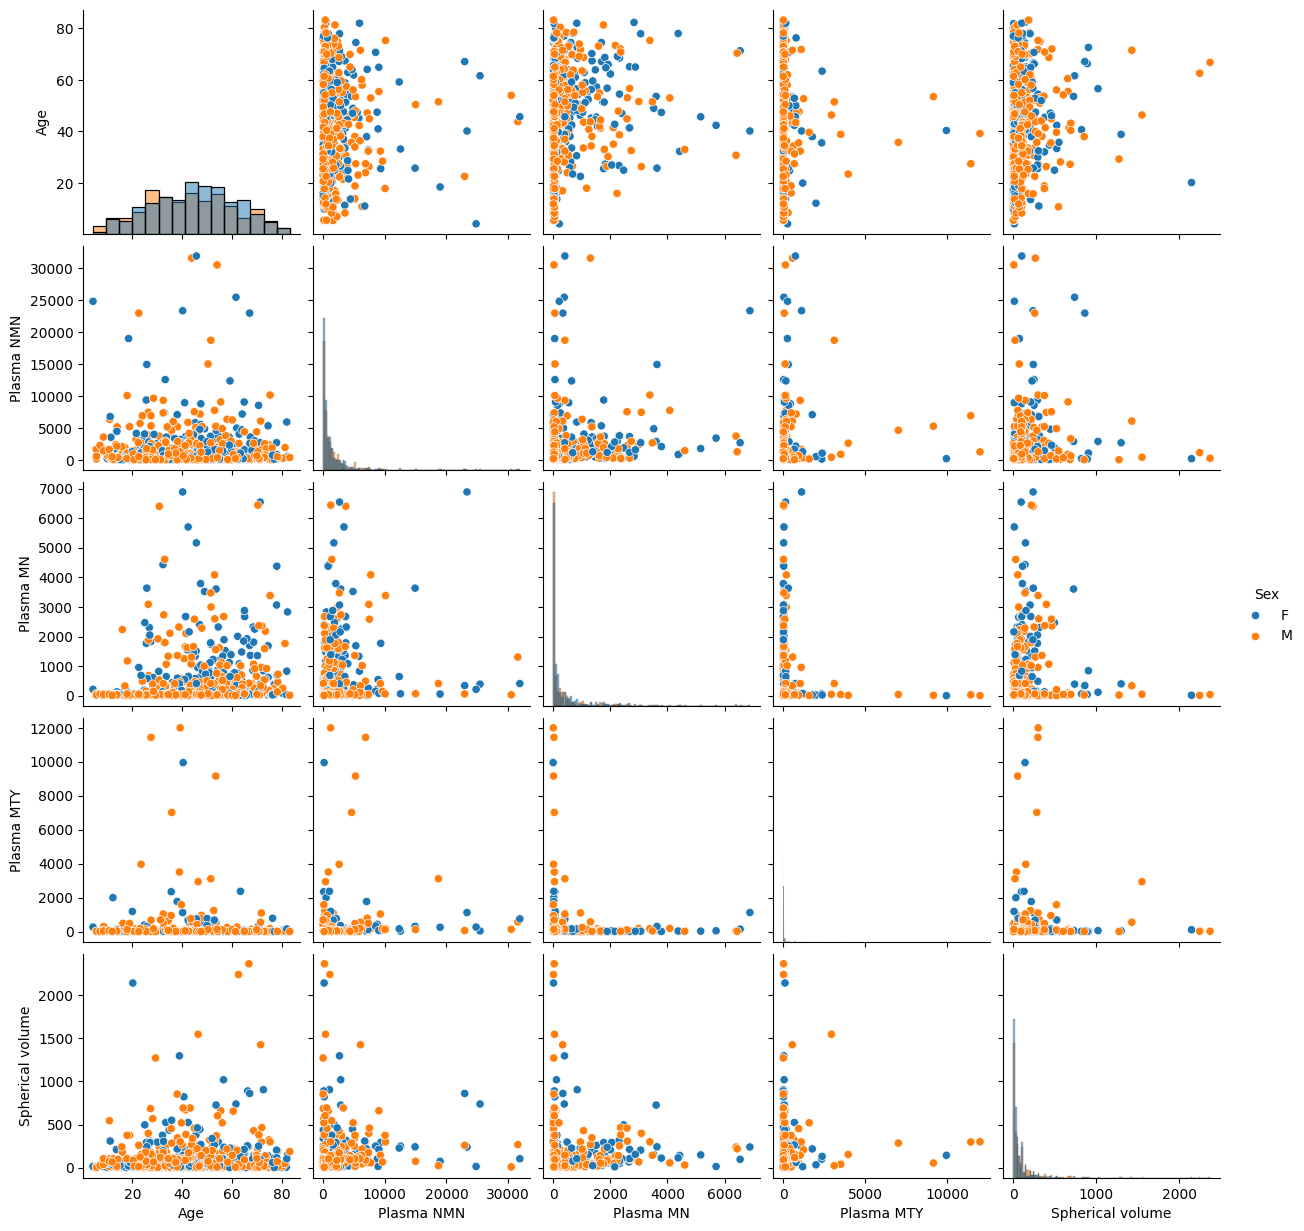

In [48]:
numeric_cols_with_sex = numeric_cols + ['Sex']

# Creamos el pairplot
sns.pairplot(data=df[numeric_cols_with_sex], diag_kind='hist', hue='Sex')
plt.show()

#### **Matriz de correlación:**

In [49]:
# Intercambiamos el order de las columnas 'Age Group' y 'Metastatic'
df = df[list(df.columns)[:-2] + ['Age Group', 'Metastatic']]
df.head()

,Patient ID,Internal Testing/External Validatio,Sex,Age,Plasma NMN,Plasma MN,Plasma MTY,Previous history,Location,Presence of SDHB,Tumor category,Spherical volume,Age Group,Metastatic
0,1,EV,F,39.0,780.0,14.0,14.0,YES,Adrenal,NO,S,25.0,Adult,NO
1,2,EV,F,28.4,421.0,289.0,19.0,YES,Adrenal,NO,B,20.6,Adult,NO
2,3,EV,F,26.8,3801.0,2306.0,28.0,NO,Adrenal,NO,B,314.2,Adult,NO
3,4,EV,F,67.1,1067.0,1700.0,14.0,NO,Adrenal,NO,B,24.5,Adult,NO
4,5,EV,F,26.9,127.0,31.0,26.0,YES,Adrenal,NO,B,4.2,Adult,NO


In [50]:
y = df['Metastatic']

# Excluimos la columna 'Patient ID' y la columna 'Metastatic'
X = df.iloc[:, 1:-1].copy()

print(df.shape)
print(X.shape)
print(y.shape)

(787, 14)
(787, 12)
(787,)


**Label encoding de variables categóricas:**

In [51]:
# Vamos a realizar Label-encoding de las variables categóricas

# Se identifican las columnas categóricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.to_list()

In [52]:
print(cat_cols)

['Internal Testing/External Validatio', 'Sex', 'Previous history', 'Location', 'Presence of SDHB', 'Tumor category', 'Age Group']


In [53]:
print(numeric_cols)

['Age', 'Plasma NMN', 'Plasma MN', 'Plasma MTY', 'Spherical volume']


In [54]:
from sklearn import preprocessing
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import LabelEncoder

# Seleccionamos solo las columnas categóricas de X
X_cat = X[cat_cols].copy()

# Creamos una instancia de LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Iteramos sobre las columnas categóricas y aplicamos Label Encoding
for col in cat_cols:
    X_cat[col] = label_encoder.fit_transform(X_cat[col])
    # Imprimimos las clases originales y sus correspondientes valores codificados
    print(col, ": ", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Concatenamos las columnas codificadas con las columnas numéricas de X
X_encoded = pd.concat([X_cat, X[numeric_cols]], axis=1)

# Mostramos la información sobre el nuevo DataFrame
X_encoded.info()
X_encoded.head()

Internal Testing/External Validatio :  {'EV': 0, 'IT': 1}
Sex :  {'F': 0, 'M': 1}
Previous history :  {'NO': 0, 'YES': 1}
Location :  {'Adrenal': 0, 'Extra-adrenal': 1}
Presence of SDHB :  {'NO': 0, 'YES': 1, 'not tested': 2}
Tumor category :  {'B': 0, 'M': 1, 'S': 2}
Age Group :  {'Adult': 0, 'Pediatric': 1}
<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 0 to 787
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Internal Testing/External Validatio  787 non-null    int64  
 1   Sex                                  787 non-null    int64  
 2   Previous history                     787 non-null    int64  
 3   Location                             787 non-null    int64  
 4   Presence of SDHB                     787 non-null    int64  
 5   Tumor category                       787 non-null    int64  
 6   Age Group                            787 non-null    int

,Internal Testing/External Validatio,Sex,Previous history,Location,Presence of SDHB,Tumor category,Age Group,Age,Plasma NMN,Plasma MN,Plasma MTY,Spherical volume
0,0,0,1,0,0,2,0,39.0,780.0,14.0,14.0,25.0
1,0,0,1,0,0,0,0,28.4,421.0,289.0,19.0,20.6
2,0,0,0,0,0,0,0,26.8,3801.0,2306.0,28.0,314.2
3,0,0,0,0,0,0,0,67.1,1067.0,1700.0,14.0,24.5
4,0,0,1,0,0,0,0,26.9,127.0,31.0,26.0,4.2


In [55]:
y_encoded = label_encoder.fit_transform(df['Metastatic'])

In [56]:
# Añadir la variable respuesta 'Metastatic' a un nuevo DataFrame llamado 'data'
data = X_encoded.copy()  # Crear una copia de X_encoded
data['Metastatic'] = y_encoded  # Añadir la variable respuesta

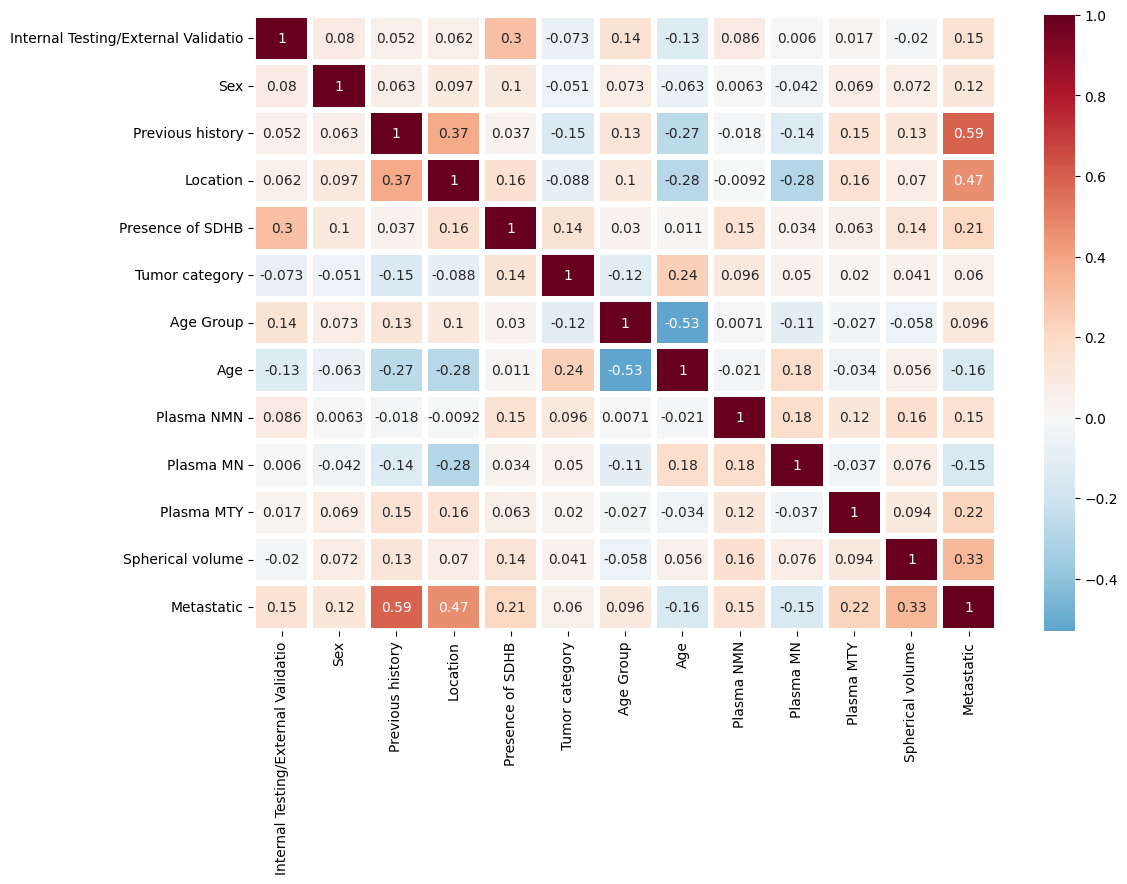

In [57]:
cor = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, linewidth=3, cmap='RdBu_r', center=0)
plt.show()

Extraemos las variables con las 10 correlaciones más altas (en valor absoluto) respecto a la variable 'Metastatic' obtenemos lo siguiente:

In [58]:
# Extraemos las correlaciones de las variables con "Metastatic" y las ordenamos por valor absoluto de mayor a menor
met_corr_abs = abs(cor['Metastatic']).sort_values(ascending=False)

# Seleccionamos las 5 primeras correlaciones (excluyendo la correlación de "price" consigo misma)
met_corr_abs[1:6]

Previous history    0.588466
Location            0.468349
Spherical volume    0.328245
Plasma MTY          0.218463
Presence of SDHB    0.207988
Name: Metastatic, dtype: float64

#### **F-score y p-valor**

In [59]:
from sklearn.feature_selection import f_classif as FC
from scipy import stats

F, pval = FC(X_encoded, y)

zscoreF = stats.zscore(F)
zscoreF

array([-0.48094088, -0.5390968 ,  2.88761491,  1.23095264, -0.33925091,
       -0.61627008, -0.57840139, -0.45891569, -0.48272452, -0.48021375,
       -0.30659683,  0.16384329])

In [60]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F_score': F,
    'p_value': pval,
    'z_score': zscoreF
})

# Ordenar por F_score de mayor a menor
results_df = results_df.sort_values(by='F_score', ascending=False)
results_df

,Feature,F_score,p_value,z_score
2,Previous history,415.842313,1.666105e-74,2.887615
3,Location,220.572693,3.723131e-44,1.230953
11,Spherical volume,94.793263,3.167050e-21,0.163843
10,Plasma MTY,39.342816,5.869562e-10,-0.306597
4,Presence of SDHB,35.493902,3.860479e-09,-0.339251
7,Age,21.389099,4.383275e-06,-0.458916
9,Plasma MN,18.878712,1.575901e-05,-0.480214
0,Internal Testing/External Validatio,18.793005,1.646585e-05,-0.480941
8,Plasma NMN,18.582769,1.833797e-05,-0.482725
1,Sex,11.938208,5.794675e-04,-0.539097


### **Balanceo de datos:**

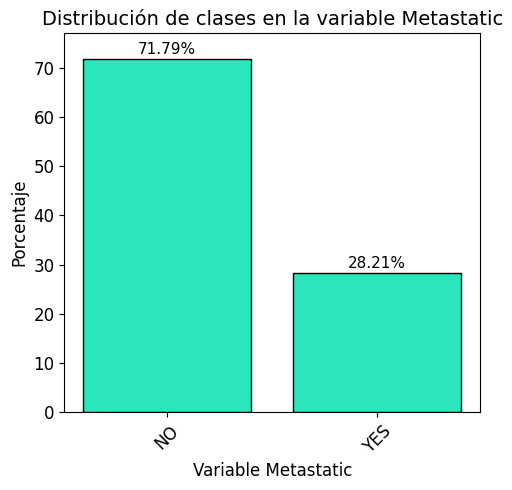

In [61]:
import matplotlib.pyplot as plt
from collections import Counter

# Obtener algunas estadísticas sobre los datos
categories = sorted(y.unique(), reverse=False)
hist = Counter(y)
total_instances = len(y)

# Calcular los porcentajes de cada clase
percentages = [round((hist[cat] / total_instances) * 100, 2) for cat in categories]

# Crear el gráfico de barras con color turquesa y bordes
plt.figure(figsize=(5, 5))  # Aumentamos el tamaño del gráfico
bars = plt.bar(categories, percentages, color='#2CE6BB', edgecolor='black')  # Añadimos bordes en color negro

# Añadir etiquetas y título
plt.xlabel('Variable Metastatic', fontsize=12)  # Ajustamos el tamaño de la letra del eje X
plt.ylabel('Porcentaje', fontsize=12)  # Ajustamos el tamaño de la letra del eje Y
plt.title('Distribución de clases en la variable Metastatic', fontsize=14)  # Ajustamos el tamaño del título
plt.xticks(rotation=45, fontsize=12)  # Ajustamos el tamaño de la letra del eje X
plt.yticks(fontsize=12)  # Ajustamos el tamaño de la letra del eje Y

plt.gca().set_ylim(0, 77)

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, percentage + 0.5, f'{percentage}%', ha='center', va='bottom', fontsize=11)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [62]:
import plotly.graph_objects as go
class_col = 'Metastatic'  # columna del dataframe que contiene la clase

# obtener algunas estadísticas sobre los datos
categories = sorted(data[class_col].unique(), reverse=False)
hist= Counter(data[class_col])
print(f'Total de instancias -> {data.shape[0]}')
print('Distribución de clases:')
for item in sorted(hist.items(), key=lambda x: x[0]): print(f'    {item[0]}: {round(item[1]/len(data[class_col]), 3)}')

print(f'Categorías -> {categories}')
print(f'Categoría del comentario -> {data[class_col][0]}')

fig = go.Figure(layout=go.Layout(height=400, width=600))
fig.add_trace(go.Bar(x=categories, y=[hist[cat] for cat in categories]))
fig.show()

Total de instancias -> 787
Distribución de clases:
    0: 0.718
    1: 0.282
Categorías -> [0, 1]
Categoría del comentario -> 0


In [63]:
# para balancear los datos
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler

In [64]:
# Barajamos los datos
df = shuffle(df)

# Creamos el oversampler con la estrategia para balancear todas las clases a la cantidad de la clase mayoritaria
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=1)

# Aplicamos el oversampling
X_oversampled, y_oversampled = oversampler.fit_resample(X_encoded, y)

# Crear DataFrame con las características oversampleadas y la variable objetivo
data_oversampled = pd.DataFrame(X_oversampled, columns=X_encoded.columns)
data_oversampled['Metastatic'] = y_oversampled

# Mostrar las primeras filas del DataFrame
data_oversampled['Metastatic'].value_counts()


Metastatic
NO     565
YES    565
Name: count, dtype: int64

In [65]:
# Comparativa de la dimensión de cada clase antes del balanceo
print("Dimensión de cada clase antes del balanceo:")
print(y.value_counts().to_string())

# Comparativa de la dimensión de cada clase después del balanceo
print("\nDimensión de cada clase después del balanceo:")
print(pd.Series(y_oversampled).value_counts().to_string())

Dimensión de cada clase antes del balanceo:
Metastatic
NO     565
YES    222

Dimensión de cada clase después del balanceo:
Metastatic
NO     565
YES    565


## **1. Modelos con las 3 características más importantes:**

In [66]:
X_3 = X_oversampled[['Previous history', 'Location', 'Spherical volume']]

**División de los datos en conjunto de entrenamiento y test:**

In [67]:
seed = 42
np.random.seed(seed)

# Dividimos los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_3, y_oversampled, test_size=0.20, random_state=seed)

In [68]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Modelos a evaluar
models = {
    'SVC_rbf': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='rbf', probability=True, random_state=0))
    ]),
    'SVC_linear': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='linear', probability=True, random_state=0))
    ]),
    'SVC_poly': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='poly', probability=True, random_state=0))
    ]),
    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(n_jobs=-1, random_state=0))
    ]),
    'DecisionTree': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=0))
    ]),
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_jobs=-1, random_state=0))
    ]),
    "BernoulliNB": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', BernoulliNB())
    ]),
    "XGBoost": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0))
    ]),
    "KNeighborsClassifier": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),
    "MLP": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(hidden_layer_sizes=(), random_state=0))
    ])
}

# Parámetros para realizar la Cross-Validation
parameters_to_cross_validate = {
    'SVC_rbf': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__C': [0.1, 1, 10], 'classifier__gamma': [1, 0.1, 0.01]
    },
    'SVC_linear': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__C': [0.1, 1, 10]
    },
    'RandomForest': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__n_estimators': [10, 100, 1000], 'classifier__max_depth': [5, 10, 15]
    },
    'LogisticRegression': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 500, 1000],
        'classifier__solver': ['lbfgs', 'saga', 'newton-cg'],
    },
    'BernoulliNB': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__alpha': [0.1, 1, 10]
    },
    'DecisionTree': {
        'classifier__max_depth': [5, 10, 20]
    },
    'XGBoost': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.01, 0.1]
    },
    'KNeighborsClassifier':{
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },
    'MLP': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__learning_rate_init': [0.001, 0.01, 0.1]
    }
}

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder

results = {}
models_results = {}

seed = 42
np.random.seed(seed)


# Validación cruzada KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iteramos sobre cada modelo
for name, model in models.items():
    print(f"Optimizando {name}...")

    # Filtramos los parámetros relevantes para el modelo actual a evaluar
    relevant_params = parameters_to_cross_validate.get(name, {})

    grid_search = GridSearchCV(model, param_grid=relevant_params, cv=kf, scoring='accuracy', n_jobs=-1)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_train)

    grid_search.fit(X_train, y_encoded)

    # Guardamos el mejor estimador y su puntuación
    models_results[name] = grid_search.best_estimator_
    results[name] = grid_search.best_score_


resultados = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).reset_index()
resultados.rename(columns={'index': 'Modelo'}, inplace=True)
resultados.sort_values(by="Accuracy", ascending=False, inplace=True)

# Los metemos en un Dataframe y mostramos
modelos_opt_clasificacion = pd.DataFrame.from_dict(models_results, orient='index', columns=[ 'Objeto']).reset_index()
modelos_opt_clasificacion.columns = ['Nombre del modelo', 'Objeto del modelo']
print(modelos_opt_clasificacion)

Optimizando SVC_rbf...
Optimizando SVC_linear...
Optimizando SVC_poly...
Optimizando LogisticRegression...
Optimizando DecisionTree...
Optimizando RandomForest...
Optimizando BernoulliNB...
Optimizando XGBoost...
Optimizando KNeighborsClassifier...
Optimizando MLP...
      Nombre del modelo                                  Objeto del modelo
0               SVC_rbf  (StandardScaler(), SVC(C=10, gamma=1, probabil...
1            SVC_linear  (MinMaxScaler(), SVC(C=1, kernel='linear', pro...
2              SVC_poly  (StandardScaler(), SVC(kernel='poly', probabil...
3    LogisticRegression  (MinMaxScaler(), LogisticRegression(C=1, n_job...
4          DecisionTree  (DecisionTreeClassifier(max_depth=20, random_s...
5          RandomForest  (MinMaxScaler(), (DecisionTreeClassifier(max_d...
6           BernoulliNB           (MinMaxScaler(), BernoulliNB(alpha=0.1))
7               XGBoost  (StandardScaler(), XGBClassifier(base_score=No...
8  KNeighborsClassifier  (StandardScaler(), KNeighborsCla

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [70]:
models_trained = {}

seed = 42
np.random.seed(seed)

# Datos originales
for name, model in models_results.items():
    models_trained[name] = model.fit(X_train, y_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [71]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def evaluate_models(models_dict, X_train, Y_train, X_test, Y_test, label_encoder):
    stats_train = {}
    stats_test = {}

    # Codificación de etiquetas
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_train_encoded = label_encoder.fit_transform(y_train)

    for name, model in models_dict.items():
        # Predicciones en el conjunto de entrenamiento
        train_predictions = model.predict(X_train)
        # Calculamos la precisión y el F1-Score para el conjunto de entrenamiento
        accuracy_train = accuracy_score(y_train_encoded, train_predictions)
        balanced_accuracy_train = balanced_accuracy_score(y_train_encoded, train_predictions)
        f1_score_train = f1_score(y_train_encoded, train_predictions, average='weighted')
        precision_train = precision_score(y_train_encoded, train_predictions, average='weighted')
        recall_train = recall_score(y_train_encoded, train_predictions, average='weighted')

        # Almacenamos las métricas del conjunto de entrenamiento
        stats_train[name] = {'Accuracy': accuracy_train, 'Balanced Accuracy': balanced_accuracy_train, 'F1-Score': f1_score_train,
                             'Precision': precision_train, 'Recall': recall_train}

        # Predicciones en el conjunto de prueba
        test_predictions = model.predict(X_test)
        # Calculamos la precisión y el F1-Score para el conjunto de prueba
        accuracy_test = accuracy_score(y_test_encoded, test_predictions)
        balanced_accuracy_test = balanced_accuracy_score(y_test_encoded, test_predictions)
        f1_score_test = f1_score(y_test_encoded, test_predictions, average='weighted')
        precision_test = precision_score(y_test_encoded, test_predictions, average='weighted')
        recall_test = recall_score(y_test_encoded, test_predictions, average='weighted')

        # Almacenamos las métricas del conjunto de prueba
        stats_test[name] = {'Accuracy': accuracy_test, 'Balanced Accuracy': balanced_accuracy_test, 'F1-Score': f1_score_test,
                            'Precision': precision_test, 'Recall': recall_test}


    # Convertimos los diccionarios a DataFrames
    resultados_train = pd.DataFrame.from_dict(stats_train, orient='index').reset_index().rename(columns={'index': 'Modelo'}).sort_values(by='Accuracy', ascending=False)
    resultados_test = pd.DataFrame.from_dict(stats_test, orient='index').reset_index().rename(columns={'index': 'Modelo'}).sort_values(by='Accuracy', ascending=False)

    return resultados_train, resultados_test


# Evaluar para datos originales
resultados_train, resultados_test = evaluate_models(models_trained, X_train, y_train, X_test, y_test, label_encoder)

In [72]:
resultados_train

,Modelo,Accuracy,Balanced Accuracy,F1-Score,Precision,Recall
4,DecisionTree,0.986726,0.986576,0.986722,0.986960,0.986726
5,RandomForest,0.986726,0.986576,0.986722,0.986960,0.986726
8,KNeighborsClassifier,0.897124,0.896269,0.896626,0.903389,0.897124
7,XGBoost,0.884956,0.884818,0.884933,0.885049,0.884956
3,LogisticRegression,0.852876,0.852806,0.852868,0.852879,0.852876
0,SVC_rbf,0.850664,0.850564,0.850648,0.850685,0.850664
9,MLP,0.841814,0.841860,0.841821,0.841879,0.841814
2,SVC_poly,0.834071,0.832867,0.832561,0.844524,0.834071
6,BernoulliNB,0.831858,0.830713,0.830469,0.841172,0.831858
1,SVC_linear,0.830752,0.829592,0.829319,0.840290,0.830752


In [73]:
resultados_test

,Modelo,Accuracy,Balanced Accuracy,F1-Score,Precision,Recall
4,DecisionTree,0.960177,0.962185,0.960198,0.963267,0.960177
5,RandomForest,0.960177,0.962185,0.960198,0.963267,0.960177
8,KNeighborsClassifier,0.920354,0.921542,0.920410,0.921764,0.920354
7,XGBoost,0.911504,0.910783,0.911456,0.911550,0.911504
0,SVC_rbf,0.889381,0.888832,0.889352,0.889359,0.889381
3,LogisticRegression,0.884956,0.884630,0.884956,0.884956,0.884956
9,MLP,0.884956,0.884630,0.884956,0.884956,0.884956
6,BernoulliNB,0.876106,0.879526,0.875951,0.884645,0.876106
1,SVC_linear,0.871681,0.875324,0.871468,0.881209,0.871681
2,SVC_poly,0.871681,0.875324,0.871468,0.881209,0.871681


#### **Gráfica comparativa**

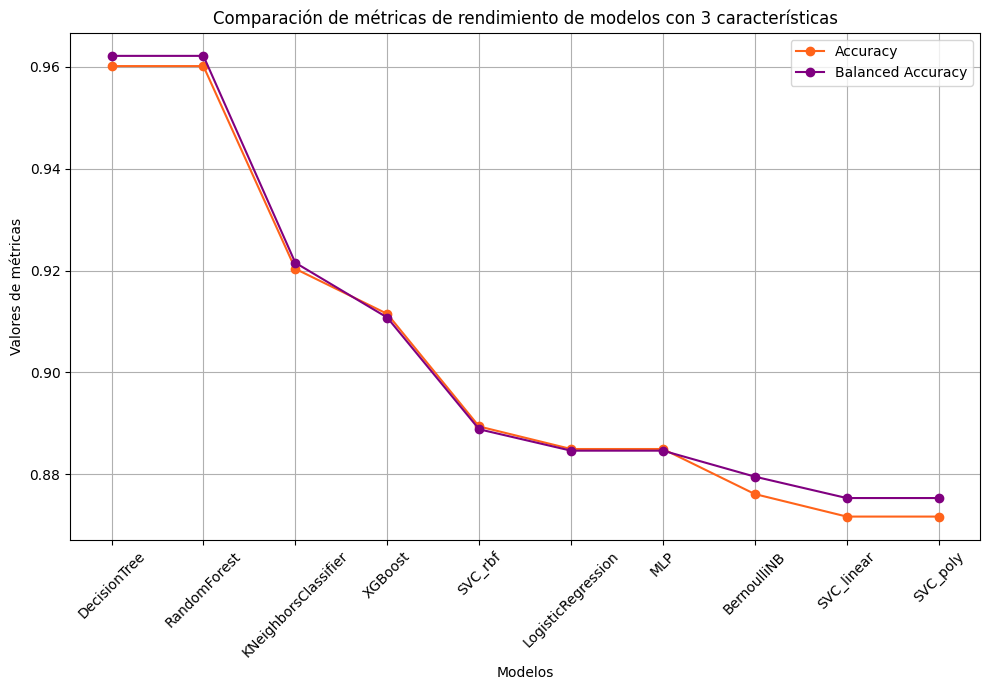

In [74]:
# Establecer el índice del DataFrame como 'Modelo'

df1 = resultados_test.copy()

df1.set_index('Modelo', inplace=True)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 7))
plt.plot(df1.index, df1['Accuracy'], marker='o', label='Accuracy', color='#FF631A')
plt.plot(df1.index, df1['Balanced Accuracy'], marker='o', label='Balanced Accuracy', color='purple')

# Añadir título y etiquetas
plt.title('Comparación de métricas de rendimiento de modelos con 3 características')
plt.xlabel('Modelos')
plt.ylabel('Valores de métricas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### **Árbol de decisión**

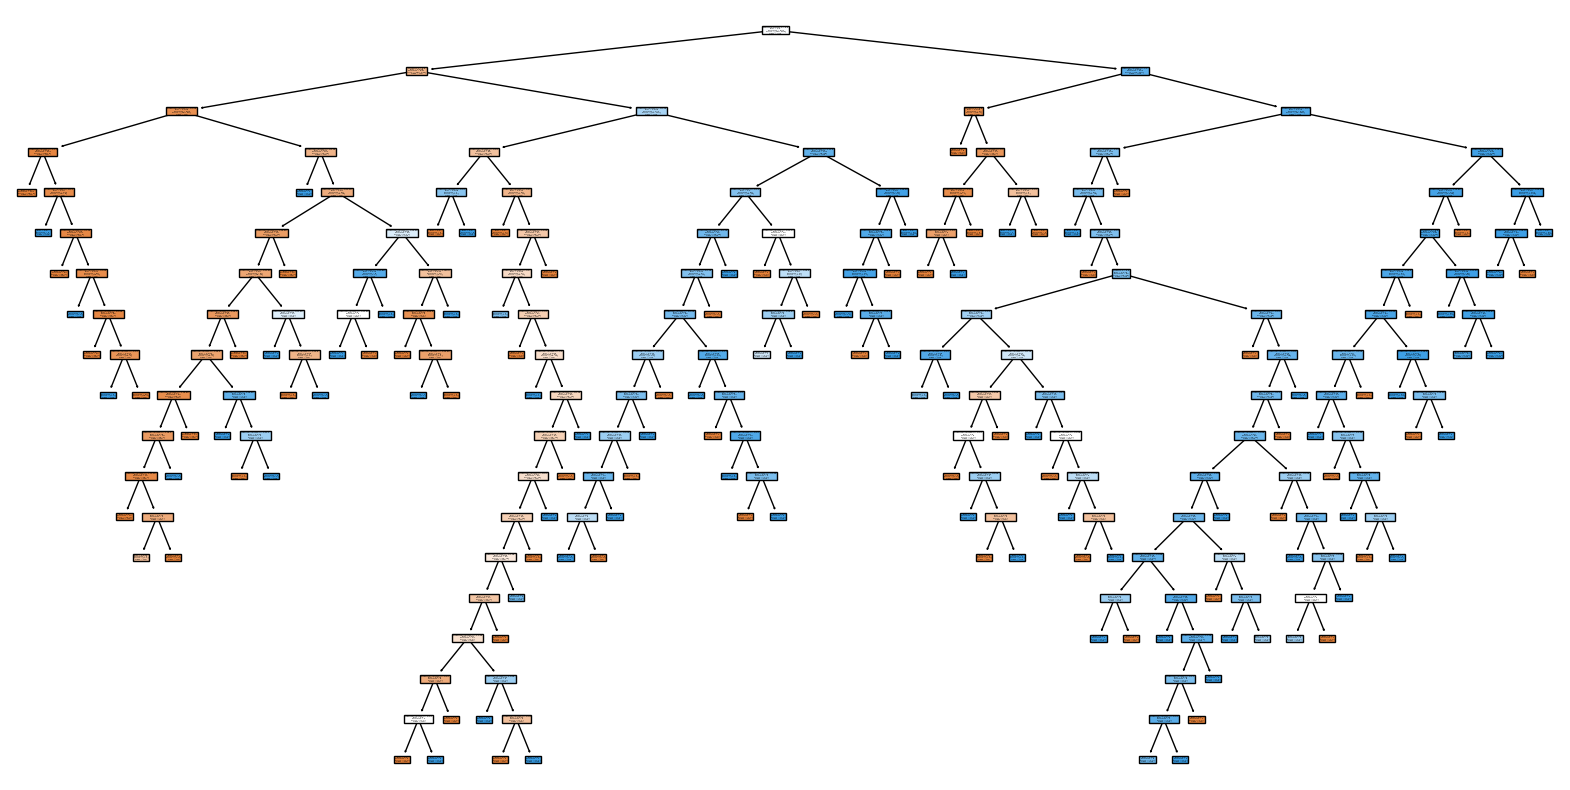

In [76]:
from sklearn.tree import plot_tree
seed = 42
np.random.seed(seed)

# Seleccionamos el modelo de Decision Tree entrenado
decisiontree_model = models_trained['DecisionTree']

# Accedemos al último paso del Pipeline que es el modelo de Decision Tree
decisiontree_estimator = decisiontree_model.named_steps['classifier']

# Configuramos el tamaño de la figura
plt.figure(figsize=(20, 10))

# Ploteamos el árbol de decisión con tamaño de fuente ajustado
plot_tree(decisiontree_estimator, filled=True, feature_names=X_train.columns, class_names=['NO', 'YES'])

# Mostramos el árbol de decisión
plt.show()

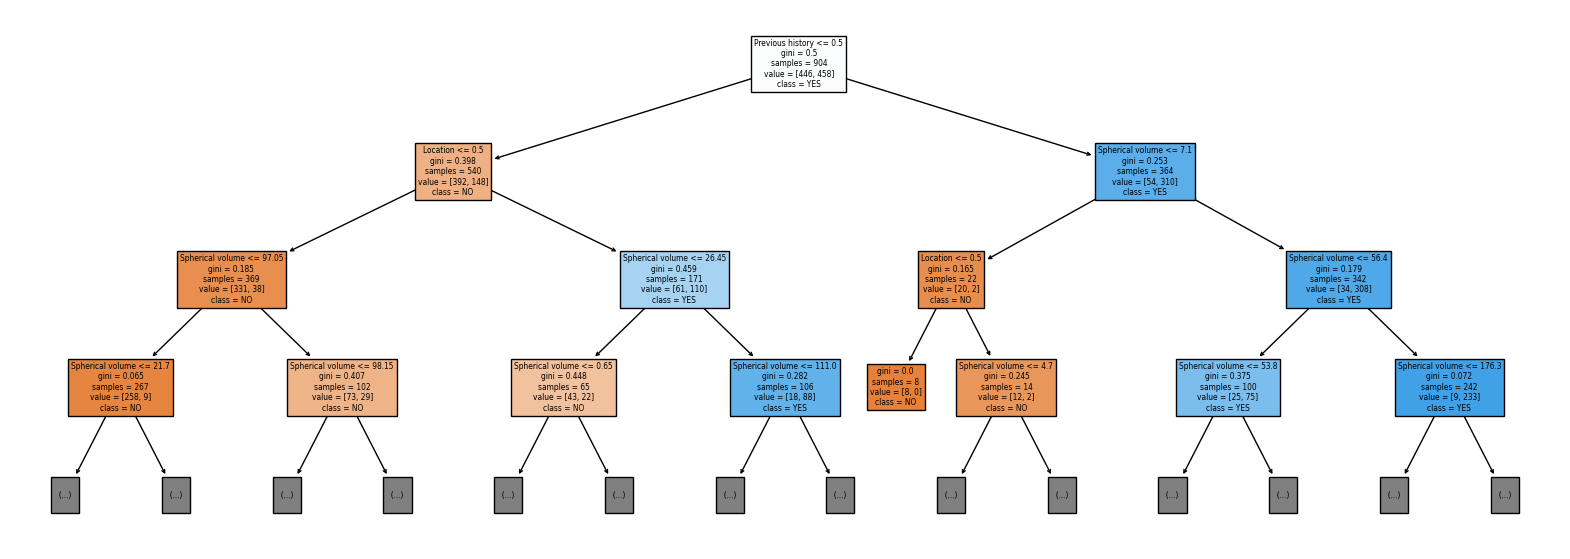

In [77]:
max_depth = 3

# Configuramos el tamaño de la figura
plt.figure(figsize=(20, 7))

# Ploteamos el árbol de decisión
plot_tree(decisiontree_estimator, filled=True, feature_names=X_train.columns, class_names=['NO', 'YES'], max_depth=max_depth)

# Mostramos el árbol de decisión
plt.show()



---



## **2. Modelos con todas las características disponibles:**

**División de los datos en conjunto de entrenamiento y test:**

In [78]:
seed = 42
np.random.seed(seed)

# Dividimos los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state=seed)

In [79]:
print(f'Tamaño del conjunto total de datos: {len(X)}')
print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
print(f'Tamaño del conjunto de test: {len(X_test)}')

Tamaño del conjunto total de datos: 787
Tamaño del conjunto de entrenamiento: 904
Tamaño del conjunto de test: 226


In [80]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.pipeline import Pipeline

# Modelos a evaluar
models = {
    'SVC_rbf': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='rbf', probability=True, random_state=0))
    ]),
    'SVC_linear': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='linear', probability=True, random_state=0))
    ]),
    'SVC_poly': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='poly', probability=True, random_state=0))
    ]),

    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(n_jobs=-1, random_state=0))
    ]),

    'DecisionTree': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=0))
    ]),

    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_jobs=-1, random_state=0))
    ]),

    "BernoulliNB": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', BernoulliNB())
    ]),

    "XGBoost": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0))
    ]),
    "KNeighborsClassifier": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_jobs=-1))
    ]),

    "MLP": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(hidden_layer_sizes=(), random_state=0))
    ])

}

# Parámetros para realizar la Cross-Validation
parameters_to_cross_validate = {
    'SVC_rbf': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__C': [0.1, 1, 10], 'classifier__gamma': [1, 0.1, 0.01]
    },
    'SVC_linear': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__C': [0.1, 1, 10]
    },
    'RandomForest': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__n_estimators': [10, 100, 1000], 'classifier__max_depth': [5, 10, 15]
    },
    'LogisticRegression': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__C': [0.1, 1, 10],
        'classifier__max_iter': [100, 500, 1000],
        'classifier__solver': ['lbfgs', 'saga', 'newton-cg'],

    },

    'BernoulliNB': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__alpha': [0.1, 1, 10]
    },
    'DecisionTree': {
        'classifier__max_depth': [5, 10, 20]
    },
    'XGBoost': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.01, 0.1]
    },
    'KNeighborsClassifier':{
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },

    'MLP': {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__learning_rate_init': [0.001, 0.01, 0.1]
    }

}

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder


results = {}
models_results = {}

seed = 42
np.random.seed(seed)

# Validación cruzada KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iteramos sobre cada modelo
for name, model in models.items():
    print(f"Optimizando {name}...")

    # Filtramos los parámetros relevantes para el modelo actual a evaluar
    relevant_params = parameters_to_cross_validate.get(name, {})

    grid_search = GridSearchCV(model, param_grid=relevant_params, cv=kf, scoring='accuracy', n_jobs=-1)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_train)

    grid_search.fit(X_train, y_encoded)

    # Guardamos el mejor estimador y su puntuación
    models_results[name] = grid_search.best_estimator_
    results[name] = grid_search.best_score_


resultados = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).reset_index()
resultados.rename(columns={'index': 'Modelo'}, inplace=True)
resultados.sort_values(by="Accuracy", ascending=False, inplace=True)

# Los metemos en un Dataframe y mostramos
modelos_opt_clasificacion = pd.DataFrame.from_dict(models_results, orient='index', columns=[ 'Objeto']).reset_index()
modelos_opt_clasificacion.columns = ['Nombre del modelo', 'Objeto del modelo']

modelos_opt_clasificacion

Optimizando SVC_rbf...
Optimizando SVC_linear...
Optimizando SVC_poly...
Optimizando LogisticRegression...
Optimizando DecisionTree...
Optimizando RandomForest...
Optimizando BernoulliNB...
Optimizando XGBoost...
Optimizando KNeighborsClassifier...
Optimizando MLP...


,Nombre del modelo,Objeto del modelo
0,SVC_rbf,"(StandardScaler(), SVC(C=10, gamma=1, probabil..."
1,SVC_linear,"(RobustScaler(), SVC(C=0.1, kernel='linear', p..."
2,SVC_poly,"(StandardScaler(), SVC(kernel='poly', probabil..."
3,LogisticRegression,"(StandardScaler(), LogisticRegression(C=0.1, n..."
4,DecisionTree,"(DecisionTreeClassifier(max_depth=20, random_s..."
5,RandomForest,"(MinMaxScaler(), (DecisionTreeClassifier(max_d..."
6,BernoulliNB,"(MinMaxScaler(), BernoulliNB(alpha=1))"
7,XGBoost,"(StandardScaler(), XGBClassifier(base_score=No..."
8,KNeighborsClassifier,"(RobustScaler(), KNeighborsClassifier(n_jobs=-1))"
9,MLP,"(RobustScaler(), MLPClassifier(hidden_layer_si..."


In [82]:
models_trained = {}

seed = 42
np.random.seed(seed)

# Datos originales
for name, model in models_results.items():
    models_trained[name] = model.fit(X_train, y_encoded)

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import balanced_accuracy_score

def evaluate_models(models_dict, X_train, y_train, X_test, y_test, label_encoder):
    stats_train = {}
    stats_test = {}

    # Codificación de etiquetas
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_train_encoded = label_encoder.fit_transform(y_train)

    for name, model in models_dict.items():
        # Predicciones en el conjunto de entrenamiento
        train_predictions = model.predict(X_train)
        # Calculamos las métricas para el conjunto de entrenamiento
        accuracy_train = accuracy_score(y_train_encoded, train_predictions)
        balanced_accuracy_train = balanced_accuracy_score(y_train_encoded, train_predictions)
        f1_score_train = f1_score(y_train_encoded, train_predictions, average='weighted')
        precision_train = precision_score(y_train_encoded, train_predictions, average='weighted')
        recall_train = recall_score(y_train_encoded, train_predictions, average='weighted')

        # Almacenamos las métricas del conjunto de entrenamiento
        stats_train[name] = {'Accuracy': accuracy_train, 'Balanced Accuracy': balanced_accuracy_train, 'F1-Score': f1_score_train,
                             'Precision': precision_train, 'Recall': recall_train}

        # Predicciones en el conjunto de prueba
        test_predictions = model.predict(X_test)
        # Calculamos las métricas para el conjunto de prueba
        accuracy_test = accuracy_score(y_test_encoded, test_predictions)
        balanced_accuracy_test = balanced_accuracy_score(y_test_encoded, test_predictions)
        f1_score_test = f1_score(y_test_encoded, test_predictions, average='weighted')
        precision_test = precision_score(y_test_encoded, test_predictions, average='weighted')
        recall_test = recall_score(y_test_encoded, test_predictions, average='weighted')

        # Almacenamos las métricas del conjunto de prueba
        stats_test[name] = {'Accuracy': accuracy_test, 'Balanced Accuracy': balanced_accuracy_test, 'F1-Score': f1_score_test,
                            'Precision': precision_test, 'Recall': recall_test}


    # Convertimos los diccionarios a DataFrames
    resultados_train2 = pd.DataFrame.from_dict(stats_train, orient='index').reset_index().rename(columns={'index': 'Modelo'}).sort_values(by='Accuracy', ascending=False)
    resultados_test2 = pd.DataFrame.from_dict(stats_test, orient='index').reset_index().rename(columns={'index': 'Modelo'}).sort_values(by='Accuracy', ascending=False)

    return resultados_train2, resultados_test2


# Evaluar para datos originales
resultados_train2, resultados_test2 = evaluate_models(models_trained, X_train, y_train, X_test, y_test, label_encoder)

In [84]:
resultados_train2

,Modelo,Accuracy,Balanced Accuracy,F1-Score,Precision,Recall
4,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000
5,RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
0,SVC_rbf,0.988938,0.988877,0.988937,0.988975,0.988938
8,KNeighborsClassifier,0.902655,0.902080,0.902428,0.905418,0.902655
2,SVC_poly,0.892699,0.892930,0.892688,0.893309,0.892699
1,SVC_linear,0.867257,0.867233,0.867257,0.867257,0.867257
9,MLP,0.852876,0.852835,0.852874,0.852874,0.852876
3,LogisticRegression,0.849558,0.849649,0.849563,0.849702,0.849558
6,BernoulliNB,0.834071,0.834335,0.834038,0.834823,0.834071


In [85]:
resultados_test2

,Modelo,Accuracy,Balanced Accuracy,F1-Score,Precision,Recall
5,RandomForest,0.982301,0.983193,0.982312,0.982939,0.982301
7,XGBoost,0.960177,0.960300,0.960186,0.960232,0.960177
4,DecisionTree,0.942478,0.943965,0.942517,0.944365,0.942478
0,SVC_rbf,0.933628,0.933676,0.933643,0.933694,0.933628
2,SVC_poly,0.915929,0.916398,0.915974,0.916341,0.915929
3,LogisticRegression,0.902655,0.903322,0.902716,0.903343,0.902655
1,SVC_linear,0.898230,0.898649,0.898284,0.898655,0.898230
9,MLP,0.898230,0.899592,0.898300,0.900093,0.898230
8,KNeighborsClassifier,0.880531,0.883727,0.880426,0.888126,0.880531
6,BernoulliNB,0.871681,0.871083,0.871649,0.871650,0.871681


#### **Gráfica comparativa**

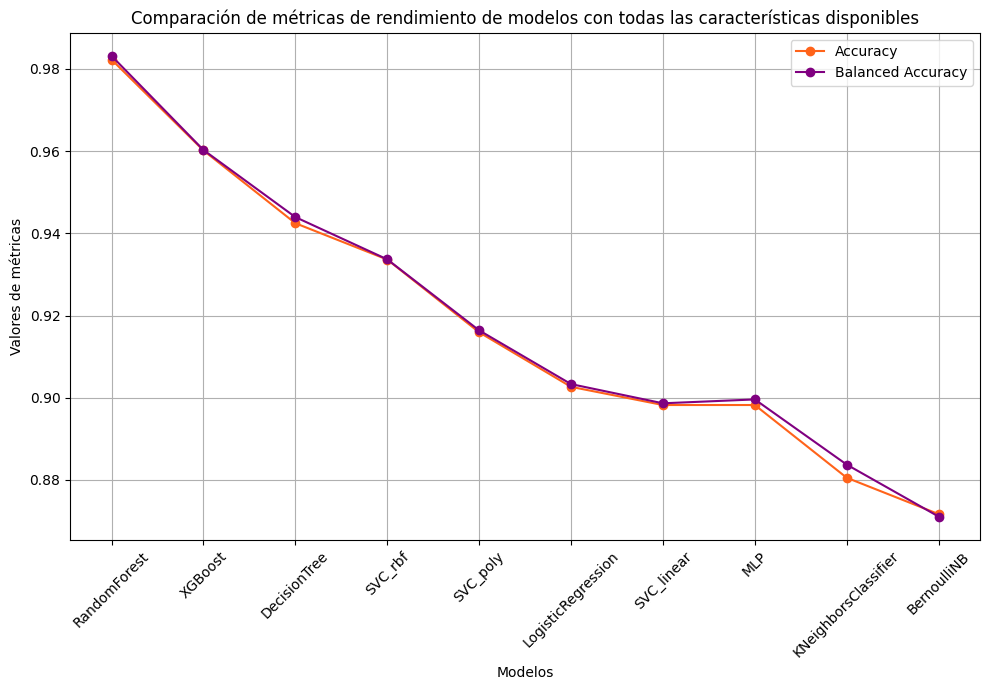

In [86]:
# Establecer el índice del DataFrame como 'Modelo'

df2 = resultados_test2.copy()

df2.set_index('Modelo', inplace=True)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 7))
plt.plot(df2.index, df2['Accuracy'], marker='o', label='Accuracy', color='#FF631A')
plt.plot(df2.index, df2['Balanced Accuracy'], marker='o', label='Balanced Accuracy', color='purple')

# Añadir título y etiquetas
plt.title('Comparación de métricas de rendimiento de modelos con todas las características disponibles')
plt.xlabel('Modelos')
plt.ylabel('Valores de métricas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### **Random Forest**

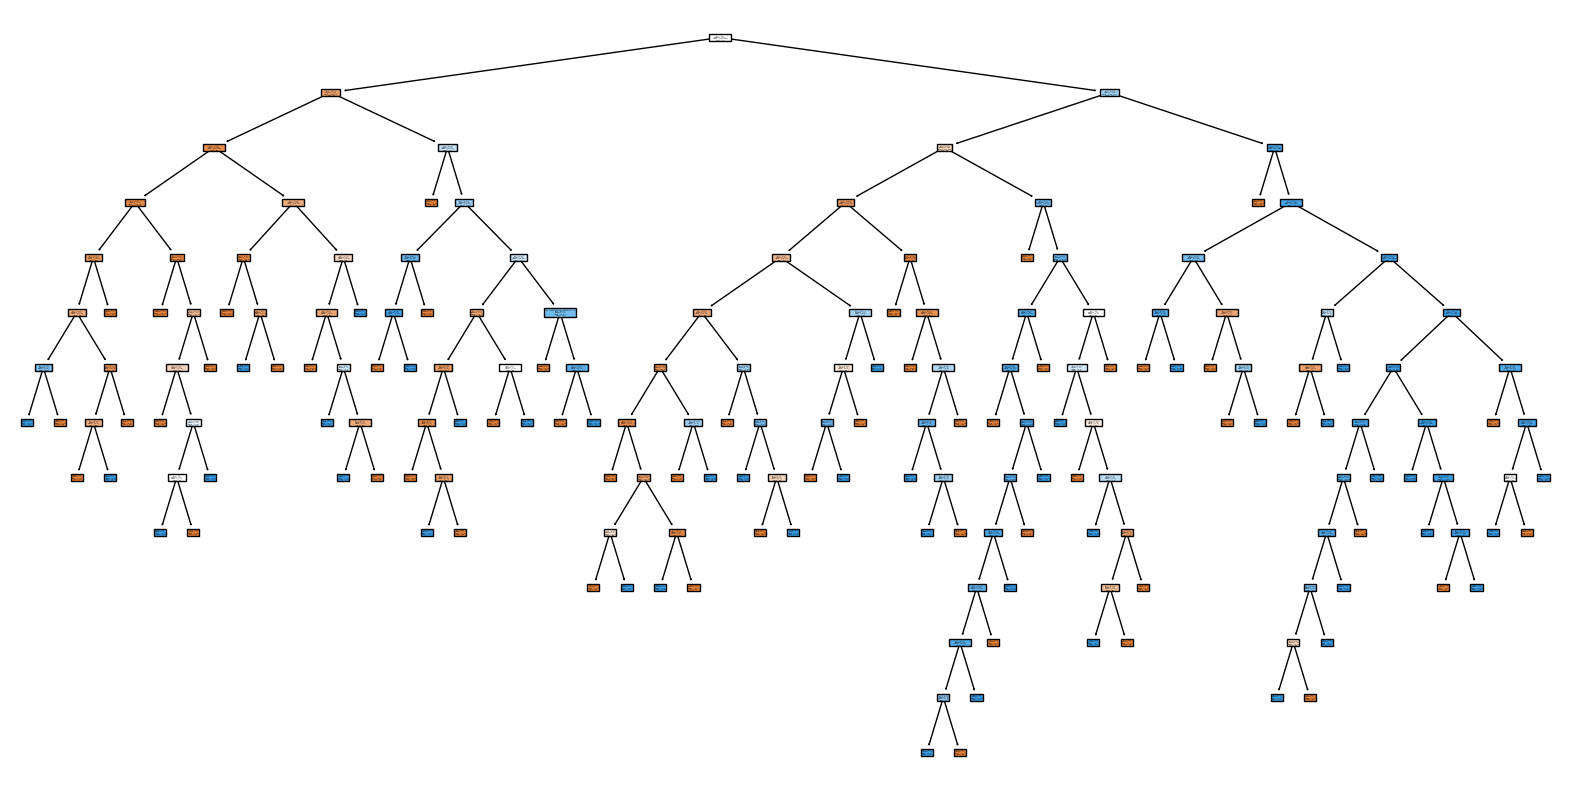

In [87]:
from sklearn.tree import plot_tree
seed = 42
np.random.seed(seed)
decision_tree_model = models_trained['RandomForest'].named_steps['classifier']


# Seleccionamos un árbol específico del Random Forest
single_tree = decision_tree_model.estimators_[0]

# Configuramos el tamaño de la figura
plt.figure(figsize=(20, 10))

# Ploteamos el árbol de decisión del Random Forest
plot_tree(single_tree, filled=True, feature_names=X_train.columns, class_names=['NO', 'YES'])

# Mostramos el árbol de decisión del Random Forest
plt.show()

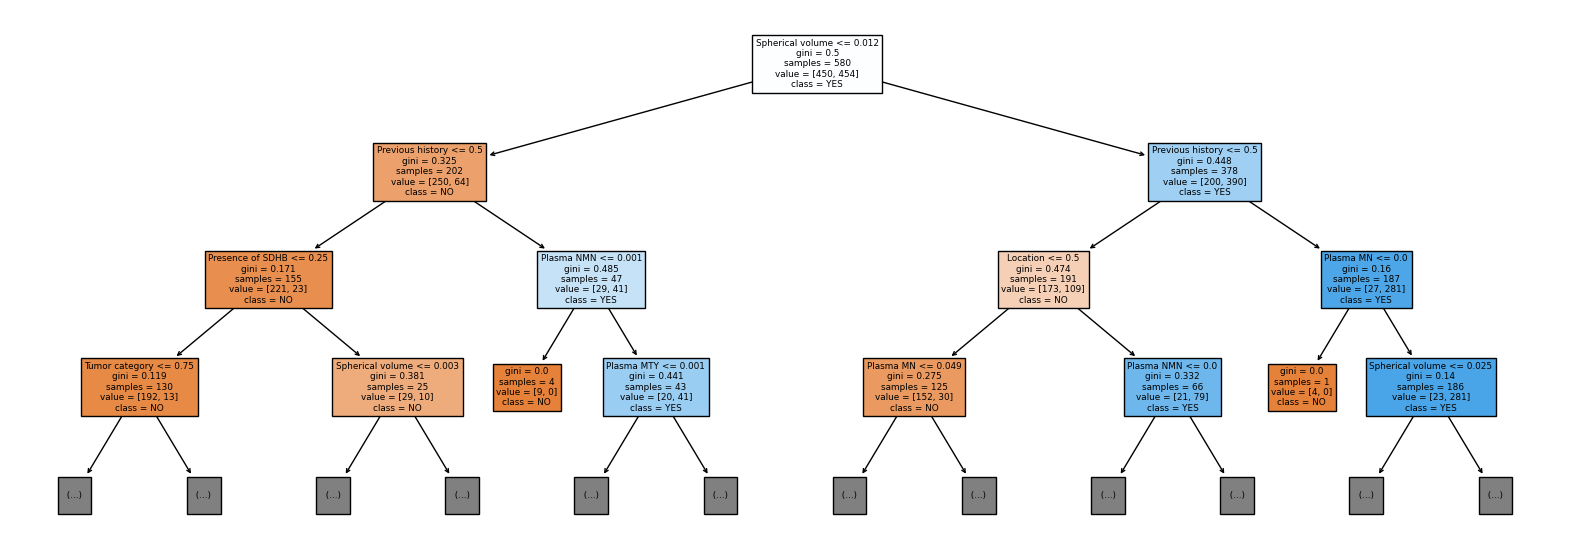

In [88]:
max_depth = 3

# Configuramos el tamaño de la figura
plt.figure(figsize=(20, 7))

# Ploteamos el árbol de decisión
plot_tree(single_tree, filled=True, feature_names=X_train.columns, class_names=['NO', 'YES'], max_depth=max_depth)

# Mostramos el árbol de decisión
plt.show()


---



#### **Comparación de ambos modelos**

In [89]:
r2 = resultados_test2[['Modelo', 'Accuracy']].copy()
r1 = resultados_test[['Modelo', 'Accuracy']].copy()


r2.columns = ['Modelo', 'Accuracy_todos']
r3 = pd.merge(left = r2, right = r1, on=['Modelo'])
r3

,Modelo,Accuracy_todos,Accuracy
0,RandomForest,0.982301,0.960177
1,XGBoost,0.960177,0.911504
2,DecisionTree,0.942478,0.960177
3,SVC_rbf,0.933628,0.889381
4,SVC_poly,0.915929,0.871681
5,LogisticRegression,0.902655,0.884956
6,SVC_linear,0.898230,0.871681
7,MLP,0.898230,0.884956
8,KNeighborsClassifier,0.880531,0.920354
9,BernoulliNB,0.871681,0.876106


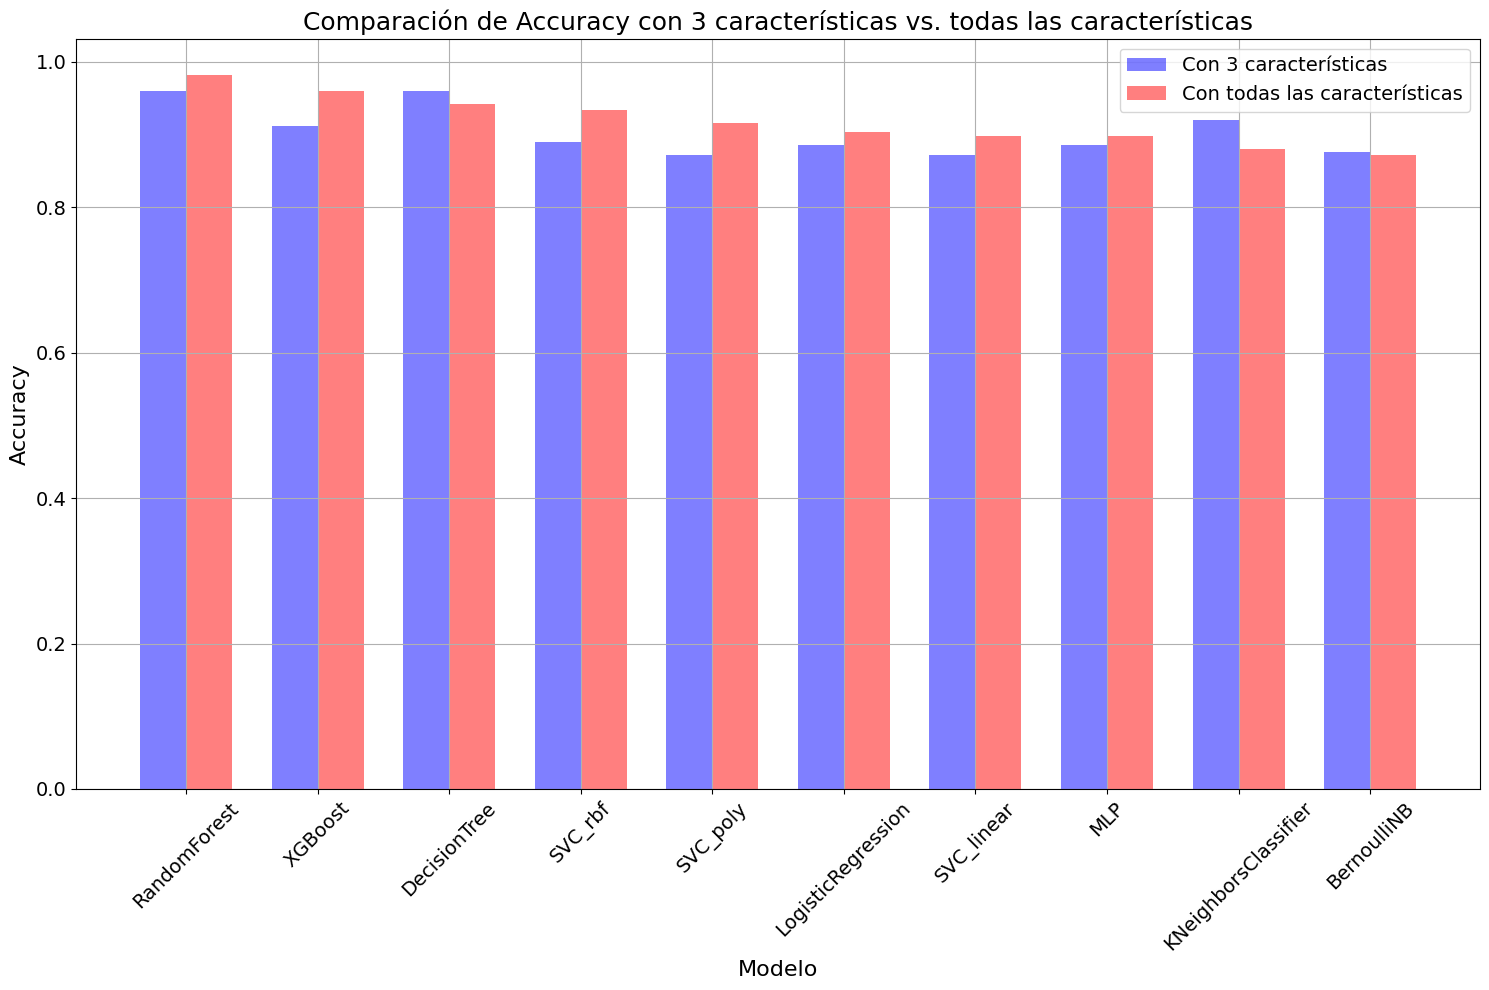

In [90]:
# Anchura de las barras
bar_width = 0.35

# Coordenadas para posicionar las barras
x = np.arange(len(r3['Modelo']))

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(x - bar_width/2, r3['Accuracy'], width=bar_width, color='blue', alpha=0.5, label='Con 3 características')
plt.bar(x + bar_width/2, r3['Accuracy_todos'], width=bar_width, color='red', alpha=0.5, label='Con todas las características')

# Añadir título y etiquetas con tamaño de fuente ajustado
plt.title('Comparación de Accuracy con 3 características vs. todas las características', fontsize=18)
plt.xlabel('Modelo', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(x, r3['Modelo'], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
